In [ ]:
import pandas as pd
import missingno as msno
import os
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [ ]:
#retrieve dataset as csv file from google drive
urllib.request.urlretrieve('https://drive.google.com/uc?id=12uBPm_GbYHLendyLBnLVichTYQm9S83w&export=download','sofa.csv')

('sofa.csv', <http.client.HTTPMessage at 0x7f6e773acd90>)

Unnamed: 0 : [    0     1     2 ... 10001 10002 10003]
ICU_Discharge_Status (Dead=1) : [0 1]
Hospital_Discharge_Status (Dead=1) : [0 1]
Age (rounded) : [ 84  54  65  59  50  41  55  77  66  62  80  74  63  67  43  61  70  53
  92  40  51  49  69  73  57  58  56  81  75  48  60  20  64  86  68  39
  76  78  23  46  52  72  45  26  42  82  98  71  96  89  90  87  97  79
  85  88  99  47  91  83  93  31  27  36  21  32  22  19  33  37  30  44
  34  29  25  18  35  38  94  95 100  28  24 105 101]
Gender : ['F' 'M']
White race : [1 0]
BMI : [29.08533216 29.68163265 18.74479599 ... 49.61742791 29.25766949
 25.3837072 ]
ICU_Length_of_Stay : [ 1.67  1.35  1.86 ...  8.26  6.28 13.93]
Hospital_Length_of_Stay : [ 8.38  3.46  6.96 ... 40.63 18.97 14.22]
Inpatient days prior to ICU : [ 0  1  3  6 14 10  2  7  5 13 16  8 15 27  4  9 61 23 52 11 20 12 22 18
 30 26 24 74 36 49 28 54 34 37 19 17 59 29]
Apache3_ScoreSAS_24hr : [ 53  41  42  24  34  65  39  51  19  38  45  60  64  82  27  36  33  22
  50

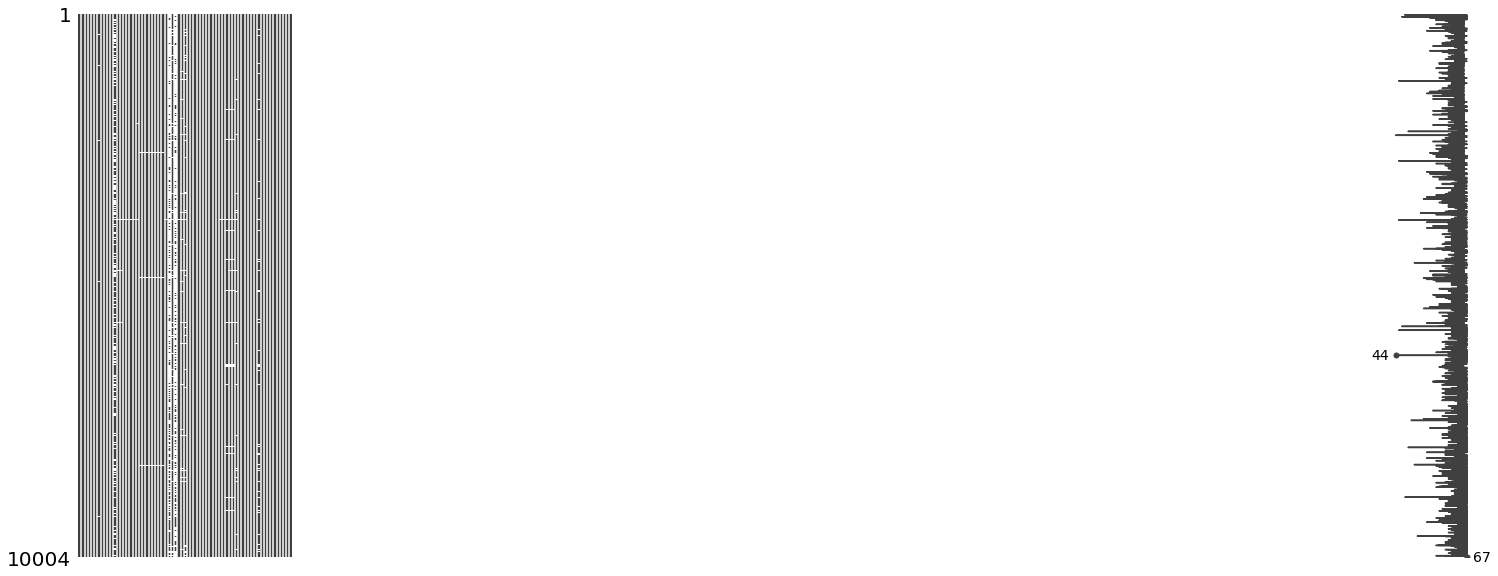

In [ ]:
data = pd.read_csv('sofa.csv')

#printing unique values for each columns
for column in data:
    print('{} : {}'.format(column,data[column].unique()))

#plotting missing values in the whole dataset
msno.matrix(data)

In [ ]:
# removing all extra unnamed colums
patients = data.loc[:,~data.columns.str.match("Unnamed")]

ICU_Discharge_Status (Dead=1) : [0 1]
Hospital_Discharge_Status (Dead=1) : [0 1]
Age (rounded) : [ 84  54  65  59  50  41  55  77  66  62  80  74  63  67  43  61  70  53
  92  40  51  49  69  73  57  58  56  81  75  48  60  20  64  86  68  39
  76  78  23  46  52  72  45  26  42  82  98  71  96  89  90  87  97  79
  85  88  99  47  91  83  93  31  27  36  21  32  22  19  33  37  30  44
  34  29  25  18  35  38  94  95 100  28  24 105 101]
Gender : ['F' 'M']
White race : [1 0]
BMI : [29.08533216 29.68163265 18.74479599 ... 49.61742791 29.25766949
 25.3837072 ]
ICU_Length_of_Stay : [ 1.67  1.35  1.86 ...  8.26  6.28 13.93]
Hospital_Length_of_Stay : [ 8.38  3.46  6.96 ... 40.63 18.97 14.22]
Inpatient days prior to ICU : [ 0  1  3  6 14 10  2  7  5 13 16  8 15 27  4  9 61 23 52 11 20 12 22 18
 30 26 24 74 36 49 28 54 34 37 19 17 59 29]
Apache3_ScoreSAS_24hr : [ 53  41  42  24  34  65  39  51  19  38  45  60  64  82  27  36  33  22
  50 137  67  44  59  32  95  37 119  87  79  76  29 106  4

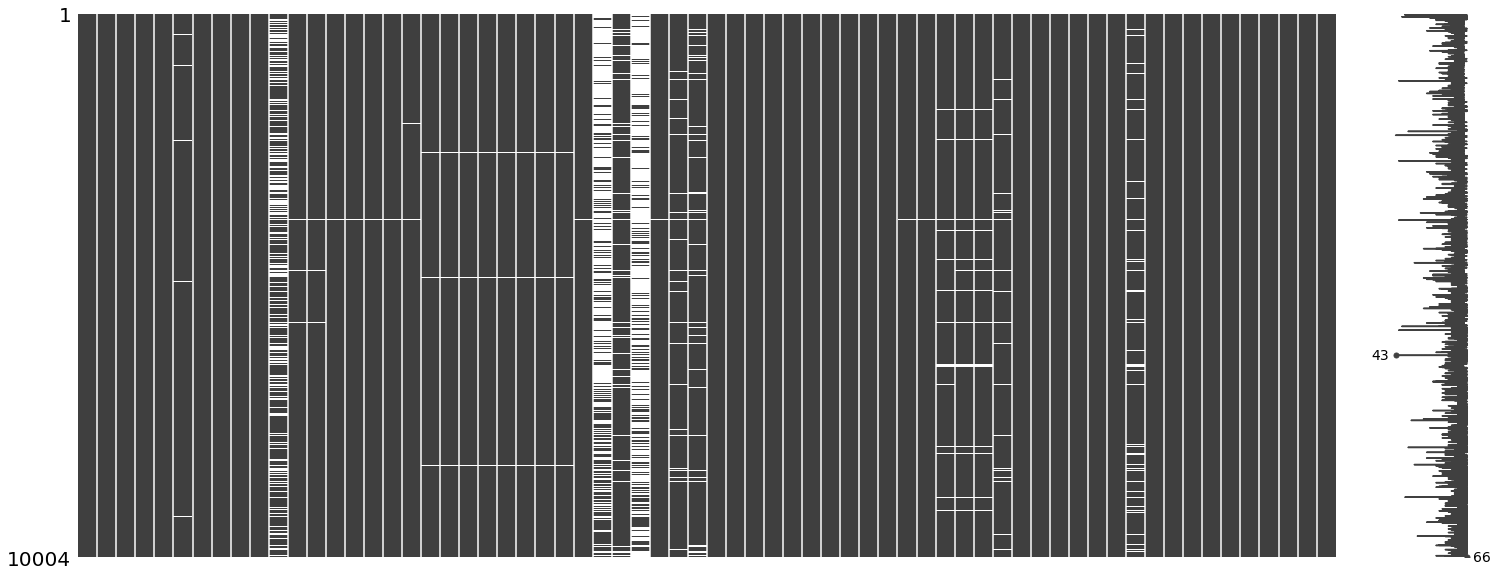

In [ ]:
for column in patients:
    print('{} : {}'.format(column,patients[column].unique()))

msno.matrix(patients)

In [ ]:
print('Total ICU deaths-> {}'.format(len(patients[(patients['ICU_Discharge_Status (Dead=1)'] == 1)])))
print('Total Hos deaths-> {}'.format(len(patients[(patients['Hospital_Discharge_Status (Dead=1)'] == 1)])))
pd.crosstab(patients['ICU_Discharge_Status (Dead=1)'],patients['Hospital_Discharge_Status (Dead=1)'])

Total ICU deaths-> 570
Total Hos deaths-> 908


Hospital_Discharge_Status (Dead=1),0,1
ICU_Discharge_Status (Dead=1),,
0,9096,338
1,0,570


In [ ]:
#Dropping ICU discharge status as it is a subset of hospital_discharge
patients = patients.drop(columns=['ICU_Discharge_Status (Dead=1)'])

In [ ]:
#renaming 'Hospital_discharge_status' to death
patients = patients.rename(columns={'Hospital_Discharge_Status (Dead=1)' : 'Death'})

In [ ]:
patients

,Death,Age (rounded),Gender,White race,BMI,ICU_Length_of_Stay,Hospital_Length_of_Stay,Inpatient days prior to ICU,Apache3_ScoreSAS_24hr,SOFA_day2,Max Day 1&2 SOFA,Mean Day 1&2 SOFA,Max week 1 SOFA redo,Mean 1 week SOFA,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,...,SOFA - Coag,SOFA - Liver,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay
0,0,84,F,1,29.085332,1.67,8.38,0,53,3.0,3.0,3.0,3.0,3.000000,140.0,85.0,95.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,13.0,68.0,85.0,NaN,0,0,0,0,0,0,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,0,54,M,1,29.681633,1.35,3.46,0,41,0.0,3.0,1.5,3.0,1.500000,105.0,49.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,1.0,1.0,...,2,2,2,3,3,5,0.0,0.0,13.0,63.0,75.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
2,0,65,F,1,18.744796,1.86,6.96,1,42,1.0,1.0,1.0,1.0,1.000000,125.0,85.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,...,1,1,0,1,1,4,0.0,0.0,17.0,70.0,84.0,15.0,0,0,0,0,0,0,12.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0,54,M,1,21.913580,3.45,8.57,0,24,0.0,0.0,0.0,1.0,0.500000,188.0,71.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0,0,0,0,0,5,0.0,0.0,10.0,101.0,113.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0
4,0,59,M,1,0.000000,2.70,2.70,0,34,1.0,1.0,1.0,1.0,1.000000,110.0,82.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,...,1,1,0,1,1,4,0.0,0.0,19.0,56.0,64.0,15.0,0,0,0,0,0,0,23.0,23,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,1,65,F,1,25.383707,2.62,8.55,0,71,4.0,4.0,4.0,5.0,4.333333,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,4.0,NaN,0.0,NaN,...,4,4,3,4,1,4,0.0,0.0,16.0,45.0,60.0,15.0,0,0,0,0,0,0,31.0,31,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0
10000,1,66,M,1,22.305471,2.30,2.30,0,180,11.0,11.0,11.0,15.0,11.666667,94.0,120.0,75.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,0.0,15.0,4.0,2.0,0.0,...,13,15,11,11,14,6,1.0,2.0,27.0,55.0,63.0,3.0,1,0,0,0,1,0,49.0,49,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0
10001,0,56,M,1,24.772097,13.93,21.16,0,89,0.0,7.0,3.5,8.0,2.571429,134.0,108.0,95.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,3.0,0.0,0.0,...,8,8,4,8,7,6,1.0,1.0,17.0,62.0,92.0,3.0,0,0,0,1,1,0,49.0,49,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1
10002,0,54,M,1,33.333333,4.23,14.22,0,109,2.0,10.0,6.0,10.0,3.200000,169.0,55.0,84.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,10.0,3.0,0.0,0.0,...,10,10,7,7,9,6,1.0,2.0,19.0,87.0,105.0,7.0,1,0,0,0,0,0,43.0,43,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1,1


In [ ]:
patients['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
#changing gender to female:0 male:1
patients['Gender'] = patients['Gender'].apply(lambda x: 0 if x=='F' else 1)
patients

,Death,Age (rounded),Gender,White race,BMI,ICU_Length_of_Stay,Hospital_Length_of_Stay,Inpatient days prior to ICU,Apache3_ScoreSAS_24hr,SOFA_day2,Max Day 1&2 SOFA,Mean Day 1&2 SOFA,Max week 1 SOFA redo,Mean 1 week SOFA,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,...,SOFA - Coag,SOFA - Liver,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay
0,0,84,0,1,29.085332,1.67,8.38,0,53,3.0,3.0,3.0,3.0,3.000000,140.0,85.0,95.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,13.0,68.0,85.0,NaN,0,0,0,0,0,0,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,0,54,1,1,29.681633,1.35,3.46,0,41,0.0,3.0,1.5,3.0,1.500000,105.0,49.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,1.0,1.0,...,2,2,2,3,3,5,0.0,0.0,13.0,63.0,75.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
2,0,65,0,1,18.744796,1.86,6.96,1,42,1.0,1.0,1.0,1.0,1.000000,125.0,85.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,...,1,1,0,1,1,4,0.0,0.0,17.0,70.0,84.0,15.0,0,0,0,0,0,0,12.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0,54,1,1,21.913580,3.45,8.57,0,24,0.0,0.0,0.0,1.0,0.500000,188.0,71.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0,0,0,0,0,5,0.0,0.0,10.0,101.0,113.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0
4,0,59,1,1,0.000000,2.70,2.70,0,34,1.0,1.0,1.0,1.0,1.000000,110.0,82.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,...,1,1,0,1,1,4,0.0,0.0,19.0,56.0,64.0,15.0,0,0,0,0,0,0,23.0,23,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,1,65,0,1,25.383707,2.62,8.55,0,71,4.0,4.0,4.0,5.0,4.333333,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,4.0,NaN,0.0,NaN,...,4,4,3,4,1,4,0.0,0.0,16.0,45.0,60.0,15.0,0,0,0,0,0,0,31.0,31,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0
10000,1,66,1,1,22.305471,2.30,2.30,0,180,11.0,11.0,11.0,15.0,11.666667,94.0,120.0,75.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,0.0,15.0,4.0,2.0,0.0,...,13,15,11,11,14,6,1.0,2.0,27.0,55.0,63.0,3.0,1,0,0,0,1,0,49.0,49,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0
10001,0,56,1,1,24.772097,13.93,21.16,0,89,0.0,7.0,3.5,8.0,2.571429,134.0,108.0,95.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,3.0,0.0,0.0,...,8,8,4,8,7,6,1.0,1.0,17.0,62.0,92.0,3.0,0,0,0,1,1,0,49.0,49,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1
10002,0,54,1,1,33.333333,4.23,14.22,0,109,2.0,10.0,6.0,10.0,3.200000,169.0,55.0,84.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,10.0,3.0,0.0,0.0,...,10,10,7,7,9,6,1.0,2.0,19.0,87.0,105.0,7.0,1,0,0,0,0,0,43.0,43,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1,1


In [ ]:
#dropping unneccessary field
patients = patients.drop(columns=['White race'])

In [ ]:
patients[(patients['Death']==1) & (patients['ICU_Length_of_Stay']>0)]

,Death,Age (rounded),Gender,BMI,ICU_Length_of_Stay,Hospital_Length_of_Stay,Inpatient days prior to ICU,Apache3_ScoreSAS_24hr,SOFA_day2,Max Day 1&2 SOFA,Mean Day 1&2 SOFA,Max week 1 SOFA redo,Mean 1 week SOFA,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,...,SOFA - Coag,SOFA - Liver,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay
56,1,74,0,20.826400,0.12,0.12,0,16,NaN,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0,0,0,0,0,1,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
100,1,68,1,30.393890,0.33,0.53,0,72,NaN,8.0,8.0,8.0,8.000000,108.0,67.0,93.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,8.0,2.0,0.0,2.0,1.0,...,8,6,7,8,5,6,0.0,0.0,29.0,59.0,72.0,15.0,0,0,0,0,0,0,NaN,16,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
118,1,87,0,27.813945,0.76,17.19,10,50,NaN,2.0,2.0,2.0,2.000000,110.0,82.0,99.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,1.0,2.0,NaN,0.0,NaN,1.0,...,2,2,1,1,2,4,0.0,0.0,26.0,73.0,79.0,14.0,0,0,0,0,0,0,19.0,19,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
142,1,80,1,29.531111,0.96,29.21,7,84,NaN,4.0,4.0,4.0,4.000000,145.0,60.0,97.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,NaN,0.0,NaN,1.0,...,4,4,3,4,1,4,0.0,0.0,15.0,50.0,65.0,15.0,0,0,0,0,0,0,36.0,36,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
200,1,93,1,29.860551,0.42,0.43,0,177,NaN,16.0,16.0,16.0,16.000000,59.0,39.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,4.0,NaN,NaN,4.0,...,16,16,12,12,12,4,1.0,2.0,12.0,52.0,131.0,3.0,1,0,0,0,0,0,51.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,82,1,24.491296,1.91,26.98,0,61,2.0,2.0,2.0,2.0,2.000000,112.0,65.0,98.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,...,2,2,1,2,2,6,0.0,0.0,24.0,50.0,63.0,15.0,0,0,0,0,0,1,23.0,23,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0
9997,1,72,0,32.656250,6.28,6.76,0,65,3.0,3.0,2.5,3.0,2.714286,80.0,70.0,97.0,1.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,2,2,1,2,1,6,0.0,0.0,20.0,102.0,106.0,15.0,0,0,0,0,1,0,28.0,28,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,0
9999,1,65,0,25.383707,2.62,8.55,0,71,4.0,4.0,4.0,5.0,4.333333,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,4.0,NaN,0.0,NaN,1.0,...,4,4,3,4,1,4,0.0,0.0,16.0,45.0,60.0,15.0,0,0,0,0,0,0,31.0,31,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0
10000,1,66,1,22.305471,2.30,2.30,0,180,11.0,11.0,11.0,15.0,11.666667,94.0,120.0,75.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,0.0,15.0,4.0,2.0,0.0,4.0,...,13,15,11,11,14,6,1.0,2.0,27.0,55.0,63.0,3.0,1,0,0,0,1,0,49.0,49,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0


In [ ]:
patients[(patients['Death']==1) & (patients['Hospital_Length_of_Stay']>0)]

,Death,Age (rounded),Gender,BMI,ICU_Length_of_Stay,Hospital_Length_of_Stay,Inpatient days prior to ICU,Apache3_ScoreSAS_24hr,SOFA_day2,Max Day 1&2 SOFA,Mean Day 1&2 SOFA,Max week 1 SOFA redo,Mean 1 week SOFA,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,...,SOFA - Coag,SOFA - Liver,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay
56,1,74,0,20.826400,0.12,0.12,0,16,NaN,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0,0,0,0,0,1,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
100,1,68,1,30.393890,0.33,0.53,0,72,NaN,8.0,8.0,8.0,8.000000,108.0,67.0,93.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,8.0,2.0,0.0,2.0,1.0,...,8,6,7,8,5,6,0.0,0.0,29.0,59.0,72.0,15.0,0,0,0,0,0,0,NaN,16,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
118,1,87,0,27.813945,0.76,17.19,10,50,NaN,2.0,2.0,2.0,2.000000,110.0,82.0,99.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,1.0,2.0,NaN,0.0,NaN,1.0,...,2,2,1,1,2,4,0.0,0.0,26.0,73.0,79.0,14.0,0,0,0,0,0,0,19.0,19,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
142,1,80,1,29.531111,0.96,29.21,7,84,NaN,4.0,4.0,4.0,4.000000,145.0,60.0,97.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,NaN,0.0,NaN,1.0,...,4,4,3,4,1,4,0.0,0.0,15.0,50.0,65.0,15.0,0,0,0,0,0,0,36.0,36,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
200,1,93,1,29.860551,0.42,0.43,0,177,NaN,16.0,16.0,16.0,16.000000,59.0,39.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,4.0,NaN,NaN,4.0,...,16,16,12,12,12,4,1.0,2.0,12.0,52.0,131.0,3.0,1,0,0,0,0,0,51.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,82,1,24.491296,1.91,26.98,0,61,2.0,2.0,2.0,2.0,2.000000,112.0,65.0,98.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,...,2,2,1,2,2,6,0.0,0.0,24.0,50.0,63.0,15.0,0,0,0,0,0,1,23.0,23,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0
9997,1,72,0,32.656250,6.28,6.76,0,65,3.0,3.0,2.5,3.0,2.714286,80.0,70.0,97.0,1.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,2,2,1,2,1,6,0.0,0.0,20.0,102.0,106.0,15.0,0,0,0,0,1,0,28.0,28,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,0
9999,1,65,0,25.383707,2.62,8.55,0,71,4.0,4.0,4.0,5.0,4.333333,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,4.0,NaN,0.0,NaN,1.0,...,4,4,3,4,1,4,0.0,0.0,16.0,45.0,60.0,15.0,0,0,0,0,0,0,31.0,31,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0
10000,1,66,1,22.305471,2.30,2.30,0,180,11.0,11.0,11.0,15.0,11.666667,94.0,120.0,75.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,0.0,15.0,4.0,2.0,0.0,4.0,...,13,15,11,11,14,6,1.0,2.0,27.0,55.0,63.0,3.0,1,0,0,0,1,0,49.0,49,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0


In [ ]:
#calculating number of days the patients was alive
patients['days'] = patients['Hospital_Length_of_Stay'] - patients['Inpatient days prior to ICU']

In [ ]:
patients

,Death,Age (rounded),Gender,BMI,ICU_Length_of_Stay,Hospital_Length_of_Stay,Inpatient days prior to ICU,Apache3_ScoreSAS_24hr,SOFA_day2,Max Day 1&2 SOFA,Mean Day 1&2 SOFA,Max week 1 SOFA redo,Mean 1 week SOFA,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,...,SOFA - Liver,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days
0,0,84,0,29.085332,1.67,8.38,0,53,3.0,3.0,3.0,3.0,3.000000,140.0,85.0,95.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,NaN,NaN,13.0,68.0,85.0,NaN,0,0,0,0,0,0,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,8.38
1,0,54,1,29.681633,1.35,3.46,0,41,0.0,3.0,1.5,3.0,1.500000,105.0,49.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,1.0,1.0,1.0,...,2,2,3,3,5,0.0,0.0,13.0,63.0,75.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,3.46
2,0,65,0,18.744796,1.86,6.96,1,42,1.0,1.0,1.0,1.0,1.000000,125.0,85.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,1.0,...,1,0,1,1,4,0.0,0.0,17.0,70.0,84.0,15.0,0,0,0,0,0,0,12.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.96
3,0,54,1,21.913580,3.45,8.57,0,24,0.0,0.0,0.0,1.0,0.500000,188.0,71.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0,0,0,0,5,0.0,0.0,10.0,101.0,113.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,8.57
4,0,59,1,0.000000,2.70,2.70,0,34,1.0,1.0,1.0,1.0,1.000000,110.0,82.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,1.0,...,1,0,1,1,4,0.0,0.0,19.0,56.0,64.0,15.0,0,0,0,0,0,0,23.0,23,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,1,65,0,25.383707,2.62,8.55,0,71,4.0,4.0,4.0,5.0,4.333333,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,4.0,NaN,0.0,NaN,1.0,...,4,3,4,1,4,0.0,0.0,16.0,45.0,60.0,15.0,0,0,0,0,0,0,31.0,31,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,8.55
10000,1,66,1,22.305471,2.30,2.30,0,180,11.0,11.0,11.0,15.0,11.666667,94.0,120.0,75.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,0.0,15.0,4.0,2.0,0.0,4.0,...,15,11,11,14,6,1.0,2.0,27.0,55.0,63.0,3.0,1,0,0,0,1,0,49.0,49,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,2.30
10001,0,56,1,24.772097,13.93,21.16,0,89,0.0,7.0,3.5,8.0,2.571429,134.0,108.0,95.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,3.0,0.0,0.0,4.0,...,8,4,8,7,6,1.0,1.0,17.0,62.0,92.0,3.0,0,0,0,1,1,0,49.0,49,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1,21.16
10002,0,54,1,33.333333,4.23,14.22,0,109,2.0,10.0,6.0,10.0,3.200000,169.0,55.0,84.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,10.0,3.0,0.0,0.0,3.0,...,10,7,7,9,6,1.0,2.0,19.0,87.0,105.0,7.0,1,0,0,0,0,0,43.0,43,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1,1,14.22


In [ ]:
#checking if there any negative days
patients[(patients['days']<0)]

,Death,Age (rounded),Gender,BMI,ICU_Length_of_Stay,Hospital_Length_of_Stay,Inpatient days prior to ICU,Apache3_ScoreSAS_24hr,SOFA_day2,Max Day 1&2 SOFA,Mean Day 1&2 SOFA,Max week 1 SOFA redo,Mean 1 week SOFA,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,...,SOFA - Liver,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days
242,0,66,0,NaN,0.43,0.59,1,39,NaN,1.0,1.0,1.0,1.0,121.0,77.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,1.0,...,1,0,1,1,4,0.0,0.0,14.0,66.0,78.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,-0.41
1583,0,73,1,24.535124,0.60,0.91,1,49,NaN,1.0,1.0,1.0,1.0,140.0,60.0,100.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,...,1,0,1,1,2,0.0,0.0,19.0,93.0,103.0,15.0,0,0,0,0,0,0,17.0,17,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,-0.09
3127,1,93,0,20.820312,0.08,0.70,1,53,NaN,1.0,1.0,1.0,1.0,75.0,84.0,98.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0,...,1,0,1,1,1,0.0,0.0,22.0,56.0,61.0,NaN,0,0,0,0,0,0,NaN,15,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,-0.30
4186,0,76,1,30.491487,0.43,0.64,1,91,NaN,3.0,3.0,3.0,3.0,111.0,142.0,91.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,NaN,1.0,NaN,1.0,...,3,2,3,2,4,0.0,0.0,24.0,78.0,75.0,15.0,0,0,0,0,0,0,23.0,23,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,-0.36
4525,1,58,1,23.302469,0.21,1.52,2,102,NaN,10.0,10.0,10.0,10.0,93.0,70.0,87.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,4.0,1.0,NaN,4.0,...,10,6,10,9,5,1.0,2.0,14.0,66.0,72.0,3.0,1,0,0,0,0,0,46.0,46,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,-0.48
4926,0,73,1,29.740627,0.06,0.73,1,16,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0.0,0.0,18.0,87.0,95.0,15.0,0,0,0,0,0,0,NaN,19,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,-0.27
6826,0,65,0,48.740895,0.19,0.90,1,29,NaN,1.0,1.0,1.0,1.0,94.0,64.0,97.0,0.0,1.0,0.0,2.0,6.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,1.0,...,1,0,1,1,1,0.0,0.0,17.0,45.0,57.0,NaN,0,1,0,0,0,0,NaN,7,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,0,-0.10
6979,1,89,0,29.129155,0.25,0.87,1,46,NaN,1.0,1.0,1.0,1.0,117.0,87.0,95.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0,...,1,0,1,1,1,0.0,0.0,26.0,40.0,57.0,NaN,0,0,0,0,0,0,NaN,19,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,-0.13
7005,1,78,1,21.491753,0.11,5.43,6,59,NaN,4.0,4.0,4.0,4.0,109.0,77.0,67.0,1.0,1.0,0.0,2.0,5.0,0.0,0.0,1.0,4.0,3.0,NaN,NaN,1.0,...,4,3,4,4,2,0.0,0.0,16.0,80.0,87.0,NaN,1,0,0,0,0,0,NaN,33,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0,-0.57
7405,1,82,0,26.989619,0.18,3.85,4,93,NaN,10.0,10.0,10.0,10.0,108.0,60.0,99.0,1.0,1.0,0.0,2.0,6.0,1.0,0.0,0.0,10.0,2.0,0.0,NaN,4.0,...,10,6,10,6,5,1.0,2.0,20.0,87.0,92.0,15.0,0,0,0,0,0,0,28.0,28,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,-0.15


In [ ]:
#converting days to length of hospital stay if days are negative
patients['days'] = patients.apply(lambda x: x['Hospital_Length_of_Stay'] if x['days']<=0 else x['days'], axis=1)

In [ ]:
#verify if there are any negative days
patients[(patients['days']<0)]

,Death,Age (rounded),Gender,BMI,ICU_Length_of_Stay,Hospital_Length_of_Stay,Inpatient days prior to ICU,Apache3_ScoreSAS_24hr,SOFA_day2,Max Day 1&2 SOFA,Mean Day 1&2 SOFA,Max week 1 SOFA redo,Mean 1 week SOFA,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,...,SOFA - Liver,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days


In [ ]:
#removing unnecessary columns as number of days are already extracted from these fields
patients = patients.drop(columns=['ICU_Length_of_Stay','Hospital_Length_of_Stay','Inpatient days prior to ICU'])

In [ ]:
patients

,Death,Age (rounded),Gender,BMI,Apache3_ScoreSAS_24hr,SOFA_day2,Max Day 1&2 SOFA,Mean Day 1&2 SOFA,Max week 1 SOFA redo,Mean 1 week SOFA,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Resp+CV+CNS+renal SOFA,...,SOFA - Liver,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days
0,0,84,0,29.085332,53,3.0,3.0,3.0,3.0,3.000000,140.0,85.0,95.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,NaN,NaN,13.0,68.0,85.0,NaN,0,0,0,0,0,0,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,8.38
1,0,54,1,29.681633,41,0.0,3.0,1.5,3.0,1.500000,105.0,49.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,1.0,1.0,1.0,0.0,0.0,1,...,2,2,3,3,5,0.0,0.0,13.0,63.0,75.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,3.46
2,0,65,0,18.744796,42,1.0,1.0,1.0,1.0,1.000000,125.0,85.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,1,...,1,0,1,1,4,0.0,0.0,17.0,70.0,84.0,15.0,0,0,0,0,0,0,12.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.96
3,0,54,1,21.913580,24,0.0,0.0,0.0,1.0,0.500000,188.0,71.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,5,0.0,0.0,10.0,101.0,113.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,8.57
4,0,59,1,0.000000,34,1.0,1.0,1.0,1.0,1.000000,110.0,82.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,1,...,1,0,1,1,4,0.0,0.0,19.0,56.0,64.0,15.0,0,0,0,0,0,0,23.0,23,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,1,65,0,25.383707,71,4.0,4.0,4.0,5.0,4.333333,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,4.0,NaN,0.0,NaN,1.0,0.0,3.0,4,...,4,3,4,1,4,0.0,0.0,16.0,45.0,60.0,15.0,0,0,0,0,0,0,31.0,31,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,8.55
10000,1,66,1,22.305471,180,11.0,11.0,11.0,15.0,11.666667,94.0,120.0,75.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,0.0,15.0,4.0,2.0,0.0,4.0,4.0,1.0,13,...,15,11,11,14,6,1.0,2.0,27.0,55.0,63.0,3.0,1,0,0,0,1,0,49.0,49,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,2.30
10001,0,56,1,24.772097,89,0.0,7.0,3.5,8.0,2.571429,134.0,108.0,95.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,3.0,0.0,0.0,4.0,0.0,1.0,8,...,8,4,8,7,6,1.0,1.0,17.0,62.0,92.0,3.0,0,0,0,1,1,0,49.0,49,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1,21.16
10002,0,54,1,33.333333,109,2.0,10.0,6.0,10.0,3.200000,169.0,55.0,84.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,10.0,3.0,0.0,0.0,3.0,3.0,1.0,10,...,10,7,7,9,6,1.0,2.0,19.0,87.0,105.0,7.0,1,0,0,0,0,0,43.0,43,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1,1,14.22


In [ ]:
patients[patients['Apache3_ScoreSAS_24hr'].isnull()]

,Death,Age (rounded),Gender,BMI,Apache3_ScoreSAS_24hr,SOFA_day2,Max Day 1&2 SOFA,Mean Day 1&2 SOFA,Max week 1 SOFA redo,Mean 1 week SOFA,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Resp+CV+CNS+renal SOFA,...,SOFA - Liver,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days


In [ ]:
patients[patients['Apache3_ScoreSAS_24hr'].isna()]

,Death,Age (rounded),Gender,BMI,Apache3_ScoreSAS_24hr,SOFA_day2,Max Day 1&2 SOFA,Mean Day 1&2 SOFA,Max week 1 SOFA redo,Mean 1 week SOFA,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Resp+CV+CNS+renal SOFA,...,SOFA - Liver,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days


In [ ]:
patients.rename(columns={"Apache3_ScoreSAS_24hr": "Apache_score"})

,Death,Age (rounded),Gender,BMI,Apache_score,SOFA_day2,Max Day 1&2 SOFA,Mean Day 1&2 SOFA,Max week 1 SOFA redo,Mean 1 week SOFA,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Resp+CV+CNS+renal SOFA,...,SOFA - Liver,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days
0,0,84,0,29.085332,53,3.0,3.0,3.0,3.0,3.000000,140.0,85.0,95.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,NaN,NaN,13.0,68.0,85.0,NaN,0,0,0,0,0,0,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,8.38
1,0,54,1,29.681633,41,0.0,3.0,1.5,3.0,1.500000,105.0,49.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,1.0,1.0,1.0,0.0,0.0,1,...,2,2,3,3,5,0.0,0.0,13.0,63.0,75.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,3.46
2,0,65,0,18.744796,42,1.0,1.0,1.0,1.0,1.000000,125.0,85.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,1,...,1,0,1,1,4,0.0,0.0,17.0,70.0,84.0,15.0,0,0,0,0,0,0,12.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.96
3,0,54,1,21.913580,24,0.0,0.0,0.0,1.0,0.500000,188.0,71.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,5,0.0,0.0,10.0,101.0,113.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,8.57
4,0,59,1,0.000000,34,1.0,1.0,1.0,1.0,1.000000,110.0,82.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,1,...,1,0,1,1,4,0.0,0.0,19.0,56.0,64.0,15.0,0,0,0,0,0,0,23.0,23,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,1,65,0,25.383707,71,4.0,4.0,4.0,5.0,4.333333,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,4.0,NaN,0.0,NaN,1.0,0.0,3.0,4,...,4,3,4,1,4,0.0,0.0,16.0,45.0,60.0,15.0,0,0,0,0,0,0,31.0,31,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,8.55
10000,1,66,1,22.305471,180,11.0,11.0,11.0,15.0,11.666667,94.0,120.0,75.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,0.0,15.0,4.0,2.0,0.0,4.0,4.0,1.0,13,...,15,11,11,14,6,1.0,2.0,27.0,55.0,63.0,3.0,1,0,0,0,1,0,49.0,49,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,2.30
10001,0,56,1,24.772097,89,0.0,7.0,3.5,8.0,2.571429,134.0,108.0,95.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,3.0,0.0,0.0,4.0,0.0,1.0,8,...,8,4,8,7,6,1.0,1.0,17.0,62.0,92.0,3.0,0,0,0,1,1,0,49.0,49,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1,21.16
10002,0,54,1,33.333333,109,2.0,10.0,6.0,10.0,3.200000,169.0,55.0,84.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,10.0,3.0,0.0,0.0,3.0,3.0,1.0,10,...,10,7,7,9,6,1.0,2.0,19.0,87.0,105.0,7.0,1,0,0,0,0,0,43.0,43,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1,1,14.22


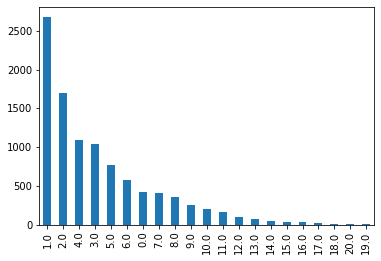

In [ ]:
patients['Max Day 1&2 SOFA'].value_counts().plot(kind='bar')

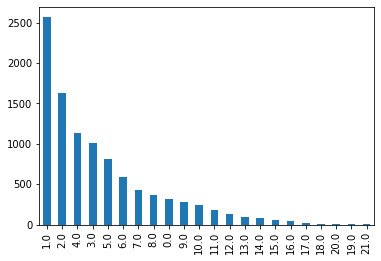

In [ ]:
patients['Max week 1 SOFA redo'].value_counts().plot(kind='bar')

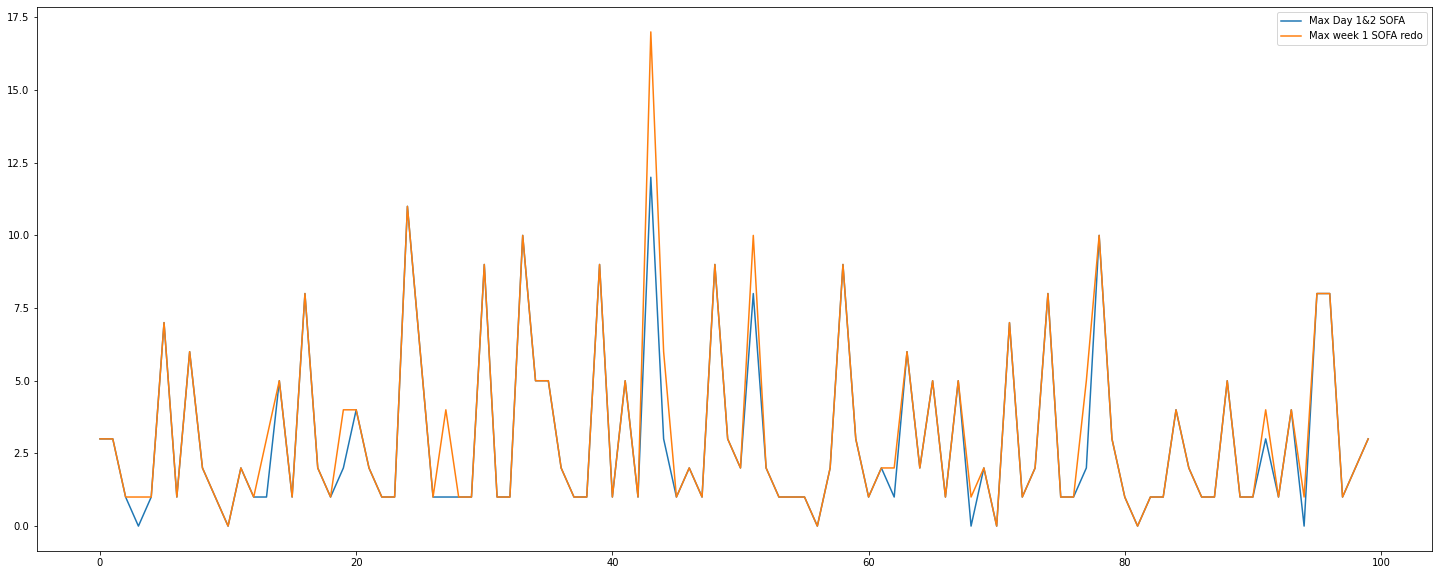

In [ ]:
patients[['Max Day 1&2 SOFA','Max week 1 SOFA redo']].head(100).plot(kind='line',figsize=(25,10))

In [ ]:
#verify if there any record having week max score greater than 2 day max score
patients[(patients['Max week 1 SOFA redo'])<(patients['Max Day 1&2 SOFA'])]

,Death,Age (rounded),Gender,BMI,Apache3_ScoreSAS_24hr,SOFA_day2,Max Day 1&2 SOFA,Mean Day 1&2 SOFA,Max week 1 SOFA redo,Mean 1 week SOFA,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Resp+CV+CNS+renal SOFA,...,SOFA - Liver,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days


In [ ]:
#getting sofa score as Max week 1 SOFA redo
patients['SOFA_score'] = patients['Max week 1 SOFA redo']

In [ ]:
#is there any NAN sofa score
patients[patients['SOFA_score'].isna()]

,Death,Age (rounded),Gender,BMI,Apache3_ScoreSAS_24hr,SOFA_day2,Max Day 1&2 SOFA,Mean Day 1&2 SOFA,Max week 1 SOFA redo,Mean 1 week SOFA,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Resp+CV+CNS+renal SOFA,...,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days,SOFA_score
1234,1,88,0,24.921875,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,NaN,14,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0.09,NaN
2165,0,41,1,21.615747,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,10.0,79.0,87.0,NaN,0,0,0,0,0,0,NaN,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2.14,NaN
2237,0,51,1,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,18,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0.13,NaN
2707,1,95,0,19.722233,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,12,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,2.25,NaN
3797,1,82,1,32.293878,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.05,NaN
5753,0,53,0,27.263267,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,15.0,0,0,0,0,0,0,NaN,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,4.11,NaN
5824,1,75,1,37.737831,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,11,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,1,0.05,NaN
6286,1,82,1,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,NaN,20,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0.07,NaN
7483,0,36,0,20.954084,7,NaN,NaN,NaN,NaN,NaN,NaN,69.0,100.0,0.0,0.0,0.0,2.0,4.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,17.0,NaN,NaN,15.0,0,0,1,0,0,0,NaN,14,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0.20,NaN
7980,1,48,0,26.901387,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,16.0,45.0,55.0,NaN,0,0,0,0,0,0,NaN,5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,1.61,NaN


In [ ]:
#drop nan rows as there any many other fields missing in these records
patients = patients.drop(patients[(patients['SOFA_score']).isna()].index)

In [ ]:
patients[patients['SOFA_score'].isna()]

,Death,Age (rounded),Gender,BMI,Apache3_ScoreSAS_24hr,SOFA_day2,Max Day 1&2 SOFA,Mean Day 1&2 SOFA,Max week 1 SOFA redo,Mean 1 week SOFA,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Resp+CV+CNS+renal SOFA,...,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days,SOFA_score


In [ ]:
patients

,Death,Age (rounded),Gender,BMI,Apache3_ScoreSAS_24hr,SOFA_day2,Max Day 1&2 SOFA,Mean Day 1&2 SOFA,Max week 1 SOFA redo,Mean 1 week SOFA,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Resp+CV+CNS+renal SOFA,...,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days,SOFA_score
0,0,84,0,29.085332,53,3.0,3.0,3.0,3.0,3.000000,140.0,85.0,95.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,13.0,68.0,85.0,NaN,0,0,0,0,0,0,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,8.38,3.0
1,0,54,1,29.681633,41,0.0,3.0,1.5,3.0,1.500000,105.0,49.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,1.0,1.0,1.0,0.0,0.0,1,...,2,3,3,5,0.0,0.0,13.0,63.0,75.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,3.46,3.0
2,0,65,0,18.744796,42,1.0,1.0,1.0,1.0,1.000000,125.0,85.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,1,...,0,1,1,4,0.0,0.0,17.0,70.0,84.0,15.0,0,0,0,0,0,0,12.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.96,1.0
3,0,54,1,21.913580,24,0.0,0.0,0.0,1.0,0.500000,188.0,71.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,5,0.0,0.0,10.0,101.0,113.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,8.57,1.0
4,0,59,1,0.000000,34,1.0,1.0,1.0,1.0,1.000000,110.0,82.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,1,...,0,1,1,4,0.0,0.0,19.0,56.0,64.0,15.0,0,0,0,0,0,0,23.0,23,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,2.70,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,1,65,0,25.383707,71,4.0,4.0,4.0,5.0,4.333333,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,4.0,NaN,0.0,NaN,1.0,0.0,3.0,4,...,3,4,1,4,0.0,0.0,16.0,45.0,60.0,15.0,0,0,0,0,0,0,31.0,31,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,8.55,5.0
10000,1,66,1,22.305471,180,11.0,11.0,11.0,15.0,11.666667,94.0,120.0,75.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,0.0,15.0,4.0,2.0,0.0,4.0,4.0,1.0,13,...,11,11,14,6,1.0,2.0,27.0,55.0,63.0,3.0,1,0,0,0,1,0,49.0,49,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,2.30,15.0
10001,0,56,1,24.772097,89,0.0,7.0,3.5,8.0,2.571429,134.0,108.0,95.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,3.0,0.0,0.0,4.0,0.0,1.0,8,...,4,8,7,6,1.0,1.0,17.0,62.0,92.0,3.0,0,0,0,1,1,0,49.0,49,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1,21.16,8.0
10002,0,54,1,33.333333,109,2.0,10.0,6.0,10.0,3.200000,169.0,55.0,84.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,10.0,3.0,0.0,0.0,3.0,3.0,1.0,10,...,7,7,9,6,1.0,2.0,19.0,87.0,105.0,7.0,1,0,0,0,0,0,43.0,43,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1,1,14.22,10.0


In [ ]:
#dropping these fields as SOFA score is already extracted
patients = patients.drop(columns=['SOFA_day2','Max Day 1&2 SOFA','Mean Day 1&2 SOFA','Max week 1 SOFA redo','Mean 1 week SOFA'])

In [ ]:
patients

,Death,Age (rounded),Gender,BMI,Apache3_ScoreSAS_24hr,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Resp+CV+CNS+renal SOFA,CV+CNS+renal SOFA,All SOFA sub-scores final (study population),SOFA - Resp,SOFA - Coag,SOFA - Liver,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days,SOFA_score
0,0,84,0,29.085332,53,140.0,85.0,95.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,13.0,68.0,85.0,NaN,0,0,0,0,0,0,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,8.38,3.0
1,0,54,1,29.681633,41,105.0,49.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,1.0,1.0,1.0,0.0,0.0,1,1,0,3,2,2,2,3,3,5,0.0,0.0,13.0,63.0,75.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,3.46,3.0
2,0,65,0,18.744796,42,125.0,85.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,1,1,0,1,1,1,0,1,1,4,0.0,0.0,17.0,70.0,84.0,15.0,0,0,0,0,0,0,12.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.96,1.0
3,0,54,1,21.913580,24,188.0,71.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,5,0.0,0.0,10.0,101.0,113.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,8.57,1.0
4,0,59,1,0.000000,34,110.0,82.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,1,1,0,1,1,1,0,1,1,4,0.0,0.0,19.0,56.0,64.0,15.0,0,0,0,0,0,0,23.0,23,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,2.70,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,1,65,0,25.383707,71,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,4.0,NaN,0.0,NaN,1.0,0.0,3.0,4,4,0,4,4,4,3,4,1,4,0.0,0.0,16.0,45.0,60.0,15.0,0,0,0,0,0,0,31.0,31,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,8.55,5.0
10000,1,66,1,22.305471,180,94.0,120.0,75.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,0.0,15.0,4.0,2.0,0.0,4.0,4.0,1.0,13,9,1,11,13,15,11,11,14,6,1.0,2.0,27.0,55.0,63.0,3.0,1,0,0,0,1,0,49.0,49,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,2.30,15.0
10001,0,56,1,24.772097,89,134.0,108.0,95.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,3.0,0.0,0.0,4.0,0.0,1.0,8,5,1,5,8,8,4,8,7,6,1.0,1.0,17.0,62.0,92.0,3.0,0,0,0,1,1,0,49.0,49,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1,21.16,8.0
10002,0,54,1,33.333333,109,169.0,55.0,84.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,10.0,3.0,0.0,0.0,3.0,3.0,1.0,10,7,1,7,10,10,7,7,9,6,1.0,2.0,19.0,87.0,105.0,7.0,1,0,0,0,0,0,43.0,43,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1,1,14.22,10.0


In [ ]:
patients[patients['Systolic BP Nearest ICU Admit'].isna()]

,Death,Age (rounded),Gender,BMI,Apache3_ScoreSAS_24hr,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Resp+CV+CNS+renal SOFA,CV+CNS+renal SOFA,All SOFA sub-scores final (study population),SOFA - Resp,SOFA - Coag,SOFA - Liver,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days,SOFA_score
56,1,74,0,20.826400,16,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0.12,0.0
682,0,70,0,19.948726,24,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,0,0,3,0.0,0.0,13.0,74.0,91.0,NaN,0,0,0,0,0,1,NaN,21,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,4.79,0.0
1004,0,59,1,36.473469,46,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,0.0,NaN,1.0,0.0,1.0,2,2,0,2,2,2,1,2,1,4,0.0,0.0,NaN,NaN,NaN,15.0,0,0,0,0,0,0,NaN,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,4.74,2.0
1466,0,32,1,31.280922,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,1,0.0,0.0,NaN,NaN,NaN,15.0,0,0,0,0,0,0,NaN,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1.75,0.0
1736,0,77,0,27.531229,20,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,1.0,0.0,NaN,NaN,1.0,1,1,0,2,1,2,2,2,1,3,0.0,0.0,15.0,84.0,90.0,15.0,0,0,0,0,0,0,NaN,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,2.38,2.0
1782,0,41,0,37.187500,39,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,3.0,2.0,NaN,NaN,1.0,0.0,NaN,3,1,0,1,3,3,2,3,3,3,0.0,0.0,18.0,73.0,85.0,15.0,0,0,0,0,0,0,NaN,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.89,3.0
1786,0,21,0,24.220049,6,NaN,NaN,NaN,0.0,0.0,0.0,2.0,4.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0.0,0.0,14.0,91.0,106.0,NaN,0,0,0,0,0,0,NaN,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.95,0.0
1939,0,62,1,33.770628,60,NaN,NaN,NaN,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,1.0,1,1,0,1,1,1,1,1,0,4,0.0,0.0,NaN,NaN,NaN,15.0,0,0,0,0,0,0,NaN,21,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,2.12,1.0
2425,0,60,0,36.452492,64,NaN,NaN,NaN,0.0,0.0,0.0,0.0,9.0,1.0,1.0,0.0,5.0,NaN,0.0,NaN,1.0,0.0,4.0,5,5,0,5,5,5,4,5,1,4,0.0,0.0,NaN,NaN,NaN,15.0,0,0,0,0,0,0,NaN,21,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1.19,5.0
2489,0,64,0,24.349609,50,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,1,1,0,1,1,1,0,1,1,4,0.0,0.0,NaN,NaN,NaN,15.0,0,0,0,0,0,0,NaN,12,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,2.09,1.0


In [ ]:
#entries after dropping all missing values
patients.dropna()

,Death,Age (rounded),Gender,BMI,Apache3_ScoreSAS_24hr,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Resp+CV+CNS+renal SOFA,CV+CNS+renal SOFA,All SOFA sub-scores final (study population),SOFA - Resp,SOFA - Coag,SOFA - Liver,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days,SOFA_score
7,0,55,1,30.267643,41,166.0,77.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,3,0,1,0,3,3,3,3,3,6,0.0,0.0,22.0,54.0,71.0,3.0,1,0,0,0,0,0,37.0,37,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,5.67,6.0
30,0,49,0,32.738095,95,112.0,119.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,0.0,0.0,3.0,0.0,2.0,9,5,1,5,9,9,6,9,7,6,1.0,1.0,21.0,61.0,72.0,15.0,0,0,0,1,0,0,25.0,25,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1,26.67,9.0
33,0,74,0,28.108269,119,109.0,106.0,72.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,4.0,0.0,0.0,3.0,2.0,1.0,10,6,1,6,10,10,7,8,9,6,1.0,2.0,18.0,71.0,79.0,10.0,1,0,0,0,0,0,45.0,45,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,1,4.05,10.0
35,0,57,0,27.221172,59,126.0,126.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,1.0,0.0,1.0,5,2,1,2,5,5,4,5,4,6,0.0,0.0,21.0,114.0,120.0,15.0,0,0,0,0,0,0,26.0,26,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1,1,7.30,5.0
43,0,74,1,41.666667,106,68.0,71.0,90.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17.0,4.0,1.0,0.0,4.0,4.0,4.0,16,12,1,13,16,17,13,13,13,6,1.0,3.0,20.0,42.0,48.0,8.0,1,0,0,1,1,1,48.0,48,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,1,9.49,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0,63,1,32.186209,65,108.0,96.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,3.0,0.0,0.0,4.0,4.0,1.0,12,9,1,9,12,12,8,8,11,6,1.0,1.0,16.0,81.0,88.0,11.0,1,1,0,1,0,0,37.0,37,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,40.63,12.0
9997,1,72,0,32.656250,65,80.0,70.0,97.0,1.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,2,2,1,2,2,2,1,2,1,6,0.0,0.0,20.0,102.0,106.0,15.0,0,0,0,0,1,0,28.0,28,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,0,6.76,3.0
10000,1,66,1,22.305471,180,94.0,120.0,75.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,0.0,15.0,4.0,2.0,0.0,4.0,4.0,1.0,13,9,1,11,13,15,11,11,14,6,1.0,2.0,27.0,55.0,63.0,3.0,1,0,0,0,1,0,49.0,49,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,2.30,15.0
10001,0,56,1,24.772097,89,134.0,108.0,95.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,3.0,0.0,0.0,4.0,0.0,1.0,8,5,1,5,8,8,4,8,7,6,1.0,1.0,17.0,62.0,92.0,3.0,0,0,0,1,1,0,49.0,49,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1,21.16,8.0


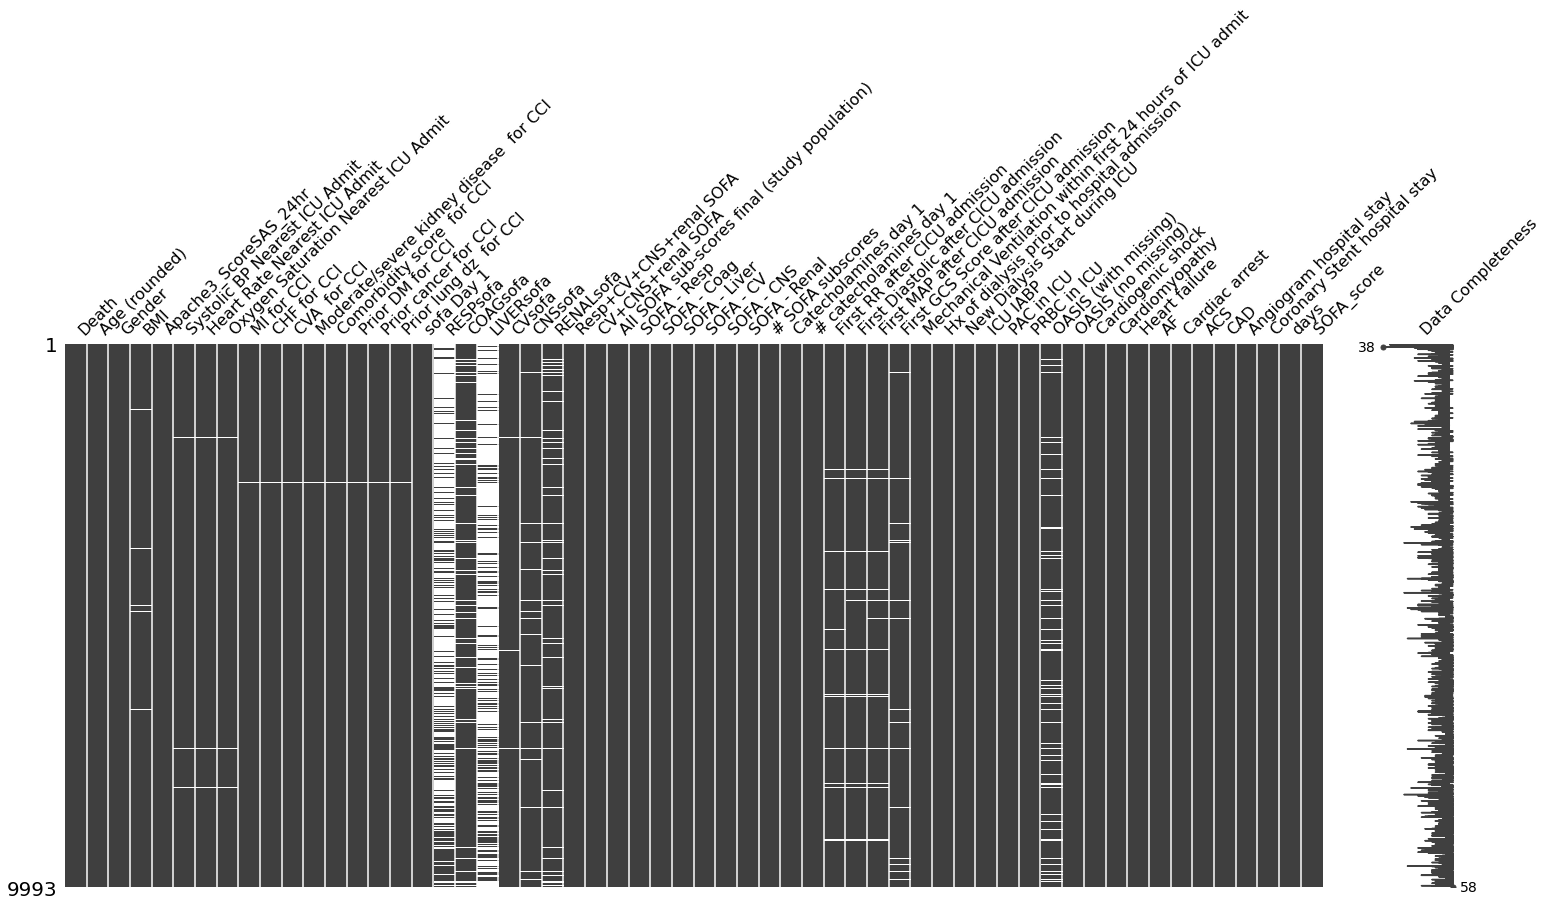

In [ ]:
#missing vlalues visualization
msno.matrix(patients, labels=True)

In [ ]:
pd.options.display.max_columns = patients.shape[1]
patients.describe()

,Death,Age (rounded),Gender,BMI,Apache3_ScoreSAS_24hr,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,sofa Day 1,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Resp+CV+CNS+renal SOFA,CV+CNS+renal SOFA,All SOFA sub-scores final (study population),SOFA - Resp,SOFA - Coag,SOFA - Liver,SOFA - CV,SOFA - CNS,SOFA - Renal,# SOFA subscores,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days,SOFA_score
count,9993.000000,9993.000000,9993.000000,9875.000000,9993.000000,9939.000000,9941.000000,9937.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9989.000000,3128.000000,9300.000000,2651.000000,9971.000000,9674.000000,9431.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9989.000000,9989.000000,9593.000000,9621.000000,9621.000000,9730.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9037.000000,9993.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,0.090163,67.448814,0.625638,29.512654,61.061843,123.074454,82.081380,95.710275,0.198154,0.195947,0.123307,0.407144,2.375840,0.284138,0.213906,0.194943,3.560316,2.527813,0.331935,0.361373,1.244810,0.348563,0.830029,3.154108,2.362854,0.121485,2.767637,3.249975,3.463024,2.316822,3.221455,2.775543,4.418593,0.177195,0.252578,18.439456,69.458268,83.535183,13.775334,0.139798,0.057040,0.032223,0.086561,0.072151,0.117382,25.871196,25.343540,0.083742,0.137033,0.386156,0.315837,0.080637,0.427226,0.606531,0.528270,0.342540,7.222169,3.989493
std,0.286430,15.217656,0.483982,7.087710,25.295784,26.290463,23.344552,6.023462,0.398629,0.396948,0.328806,0.805349,2.618956,0.451025,0.410082,0.396177,3.231474,1.056386,0.637090,0.736080,0.887075,0.942832,1.120925,2.955072,2.052267,0.326706,2.370937,3.053033,3.121739,2.706872,2.717830,2.743096,0.939206,0.381853,0.616953,5.739717,16.984757,18.059009,3.152298,0.346795,0.231931,0.176600,0.281204,0.258750,0.321891,10.325148,10.345182,0.277015,0.343899,0.486892,0.464872,0.272291,0.494700,0.488544,0.499225,0.474583,12.479026,3.414017
min,0.000000,18.000000,0.000000,0.000000,0.000000,50.000000,21.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,21.000000,31.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,0.000000,58.000000,0.000000,24.920166,44.000000,105.000000,67.000000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,15.000000,58.000000,72.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.510000,1.000000
50%,0.000000,69.000000,1.000000,28.415533,58.000000,121.000000,79.000000,97.000000

In [ ]:
#calculate number of missing values in these 6 fields
print('missing RESPsofa : {} ({}%)'.format(patients.RESPsofa.isna().sum(), patients.RESPsofa.isna().sum()*100//len(patients)))
print('missing COAGsofa : {} ({}%)'.format(patients.COAGsofa.isna().sum(), patients.COAGsofa.isna().sum()*100//len(patients)))
print('missing LIVERsofa : {} ({}%)'.format(patients.LIVERsofa.isna().sum(), patients.LIVERsofa.isna().sum()*100//len(patients)))
print('missing CVsofa : {} ({}%)'.format(patients.CVsofa.isna().sum(), patients.CVsofa.isna().sum()*100//len(patients)))
print('missing CNSsofa : {} ({}%)'.format(patients.CNSsofa.isna().sum(), patients.CNSsofa.isna().sum()*100//len(patients)))
print('missing RENALsofa : {} ({}%)'.format(patients.RENALsofa.isna().sum(), patients.RENALsofa.isna().sum()*100//len(patients)))

missing RESPsofa : 6865 (68%)
missing COAGsofa : 693 (6%)
missing LIVERsofa : 7342 (73%)
missing CVsofa : 22 (0%)
missing CNSsofa : 319 (3%)
missing RENALsofa : 562 (5%)


In [ ]:
patients[['SOFA_score','RESPsofa','COAGsofa','LIVERsofa','CVsofa','CNSsofa','RENALsofa','Resp+CV+CNS+renal SOFA','CV+CNS+renal SOFA']]

,SOFA_score,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Resp+CV+CNS+renal SOFA,CV+CNS+renal SOFA
0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,3.0,NaN,1.0,1.0,1.0,0.0,0.0,1,1
2,1.0,NaN,0.0,NaN,1.0,0.0,0.0,1,1
3,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0,0
4,1.0,NaN,0.0,NaN,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...
9999,5.0,NaN,0.0,NaN,1.0,0.0,3.0,4,4
10000,15.0,4.0,2.0,0.0,4.0,4.0,1.0,13,9
10001,8.0,3.0,0.0,0.0,4.0,0.0,1.0,8,5
10002,10.0,3.0,0.0,0.0,3.0,3.0,1.0,10,7


In [ ]:
#calculating SOFAResp score by using other fields
patients['res'] = patients['Resp+CV+CNS+renal SOFA'] - patients['CV+CNS+renal SOFA']
patients[['SOFA_score','RESPsofa','res']]

,SOFA_score,RESPsofa,res
0,3.0,NaN,0
1,3.0,NaN,0
2,1.0,NaN,0
3,1.0,NaN,0
4,1.0,NaN,0
...,...,...,...
9999,5.0,NaN,0
10000,15.0,4.0,4
10001,8.0,3.0,3
10002,10.0,3.0,3


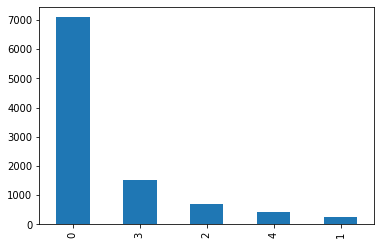

In [ ]:
#checking range of values for calculated resSofa Score
patients['res'].value_counts().plot(kind='bar')

In [ ]:
#whether any records contains different res score and RESPsofa Score if RESPscore is not null
len(patients[(~patients['RESPsofa'].isna()) & (patients['res'] != patients['RESPsofa'])])

0

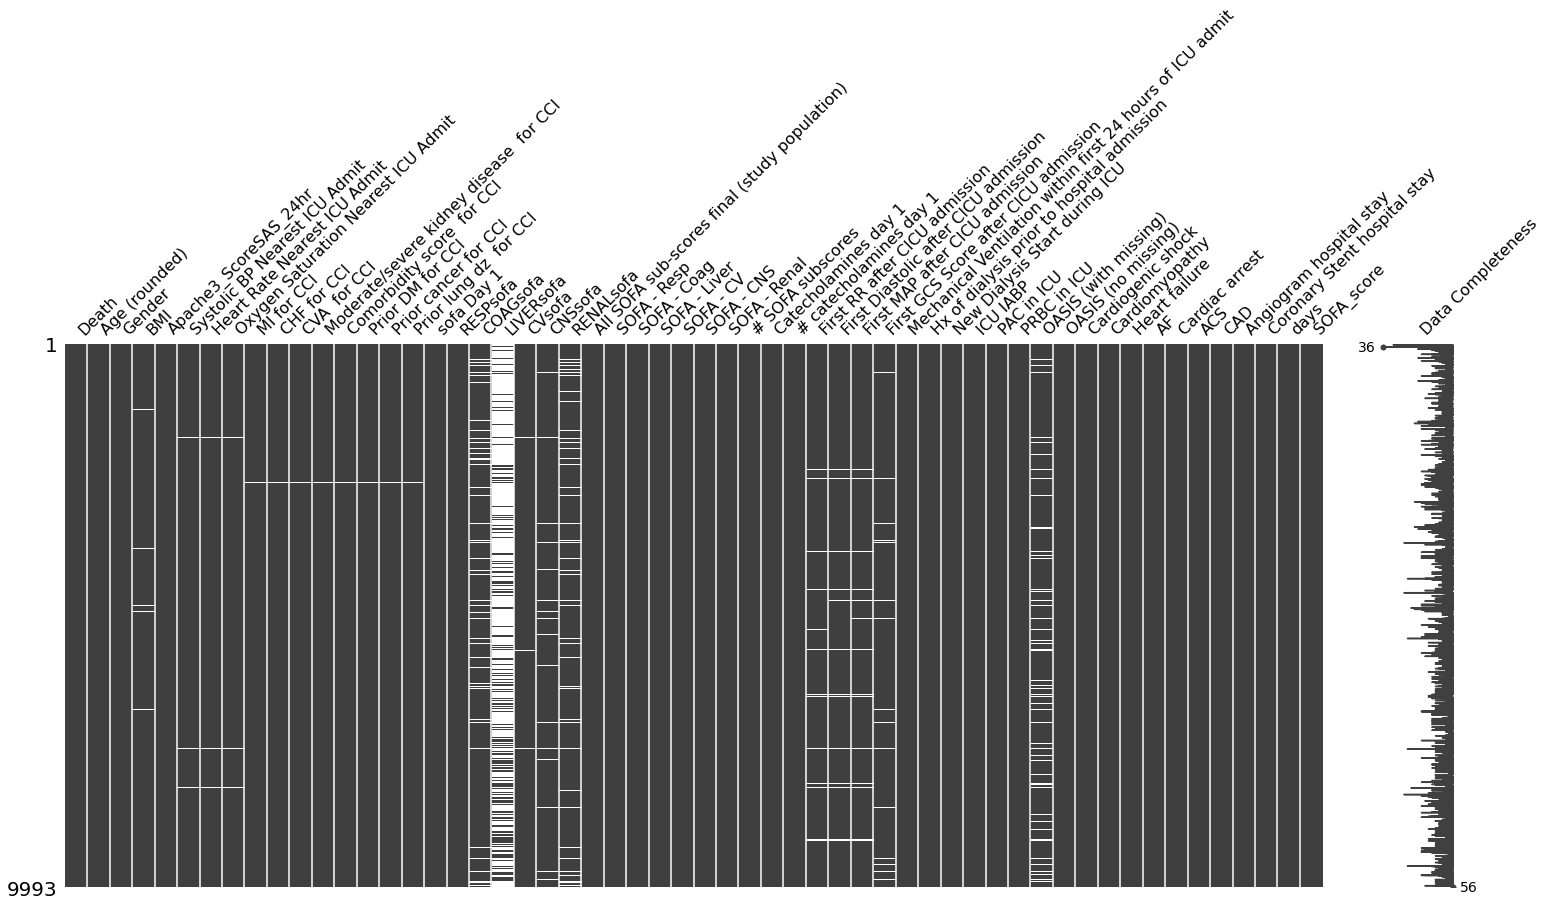

In [ ]:
#assigning res to RESPsofa
patients['RESPsofa'] = patients['res']
patients = patients.drop(columns=['res','Resp+CV+CNS+renal SOFA','CV+CNS+renal SOFA'])
msno.matrix(patients, labels=True)

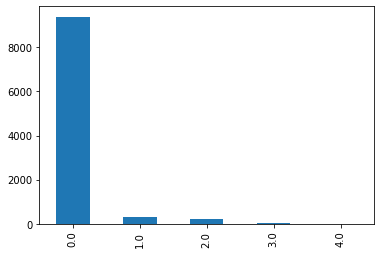

In [ ]:
#calculating Sofa score of Liver and checking its range of values
patients['liver'] = patients['sofa Day 1'] - patients['SOFA - Liver']
patients['liver'].value_counts().plot(kind='bar')

In [ ]:
#whether any records contains different liver score and LIVERsofa Score if LIVERscore is not null
len(patients[(~patients['LIVERsofa'].isna()) & (patients['liver'] != patients['LIVERsofa'])])

0

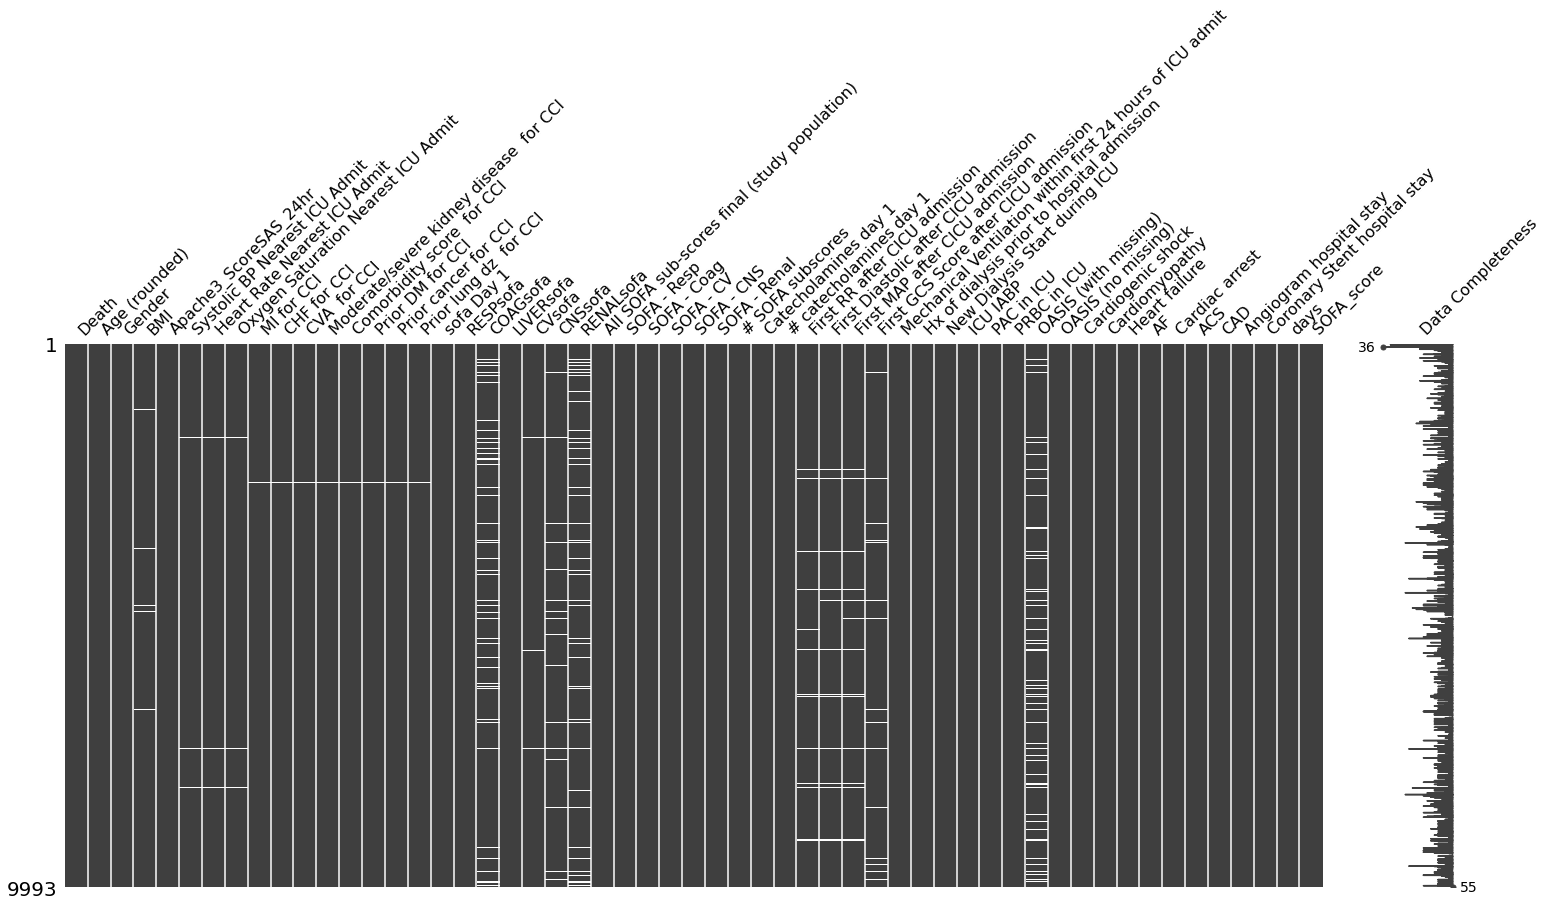

In [ ]:
#assigning liver score to LIVERsofa and dropping extra columns
patients['LIVERsofa'] = patients['liver']
patients = patients.drop(columns=['liver','SOFA - Liver'])
msno.matrix(patients, labels=True)

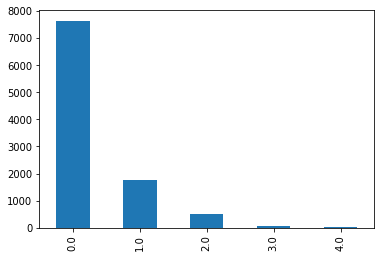

In [ ]:
patients['coag'] = patients['sofa Day 1'] - patients['SOFA - Coag']
patients['coag'].value_counts().plot(kind='bar')

In [ ]:
len(patients[(~patients['COAGsofa'].isna()) & (patients['coag'] != patients['COAGsofa'])])

0

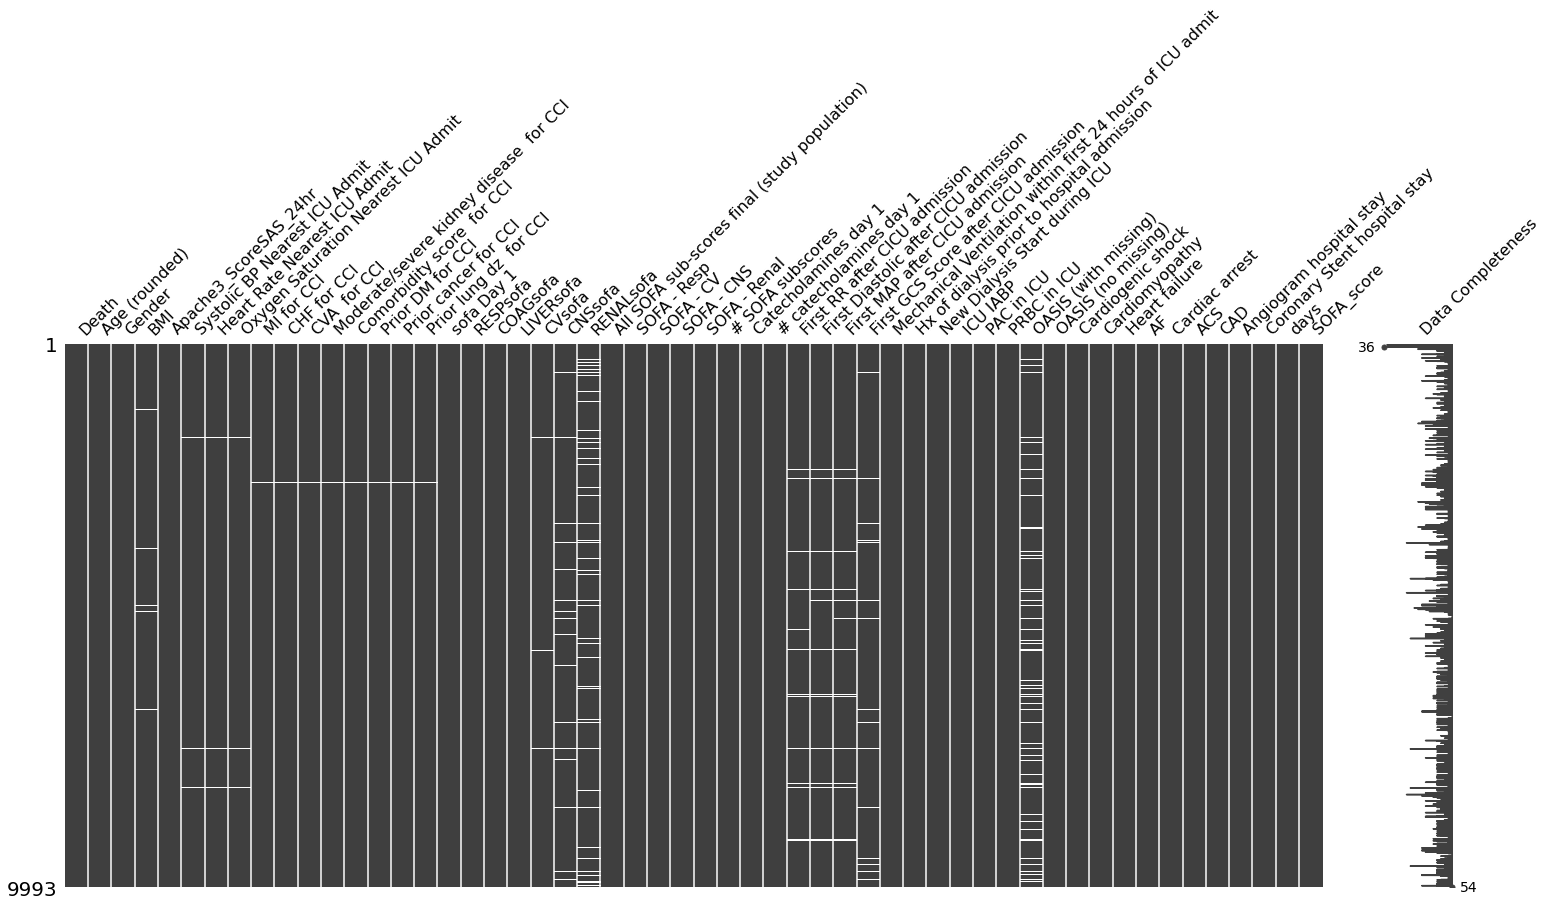

In [ ]:
patients['COAGsofa'] = patients['coag']
patients = patients.drop(columns=['coag','SOFA - Coag'])
msno.matrix(patients, labels=True)

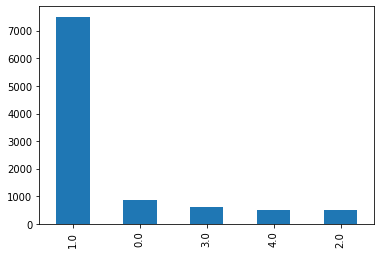

In [ ]:
patients['cv'] = patients['sofa Day 1'] - patients['SOFA - CV']
patients['cv'].value_counts().plot(kind='bar')

In [ ]:
len(patients[(~patients['CVsofa'].isna()) & (patients['cv'] != patients['CVsofa'])])

0

In [ ]:
patients['CVsofa'] = patients['cv']
patients = patients.drop(columns=['cv','SOFA - CV'])

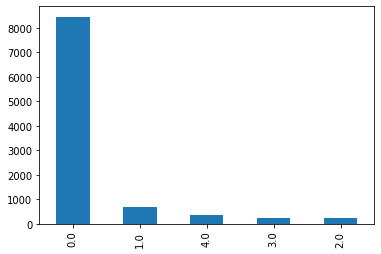

In [ ]:
patients['cns'] = patients['sofa Day 1'] - patients['SOFA - CNS']
patients['cns'].value_counts().plot(kind='bar')

In [ ]:
len(patients[(~patients['CNSsofa'].isna()) & (patients['cns'] != patients['CNSsofa'])])

0

In [ ]:
patients['CNSsofa'] = patients['cns']
patients = patients.drop(columns=['cns','SOFA - CNS'])

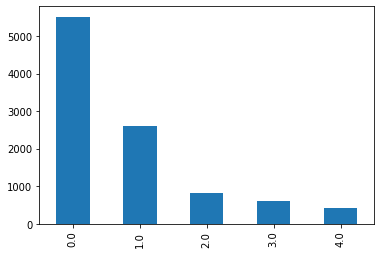

In [ ]:
patients['renal'] = patients['sofa Day 1'] - patients['SOFA - Renal']
patients['renal'].value_counts().plot(kind='bar')

In [ ]:
len(patients[(~patients['RENALsofa'].isna()) & (patients['renal'] != patients['RENALsofa'])])

0

In [ ]:
patients['RENALsofa'] = patients['renal']
patients = patients.drop(columns=['renal','SOFA - Renal'])

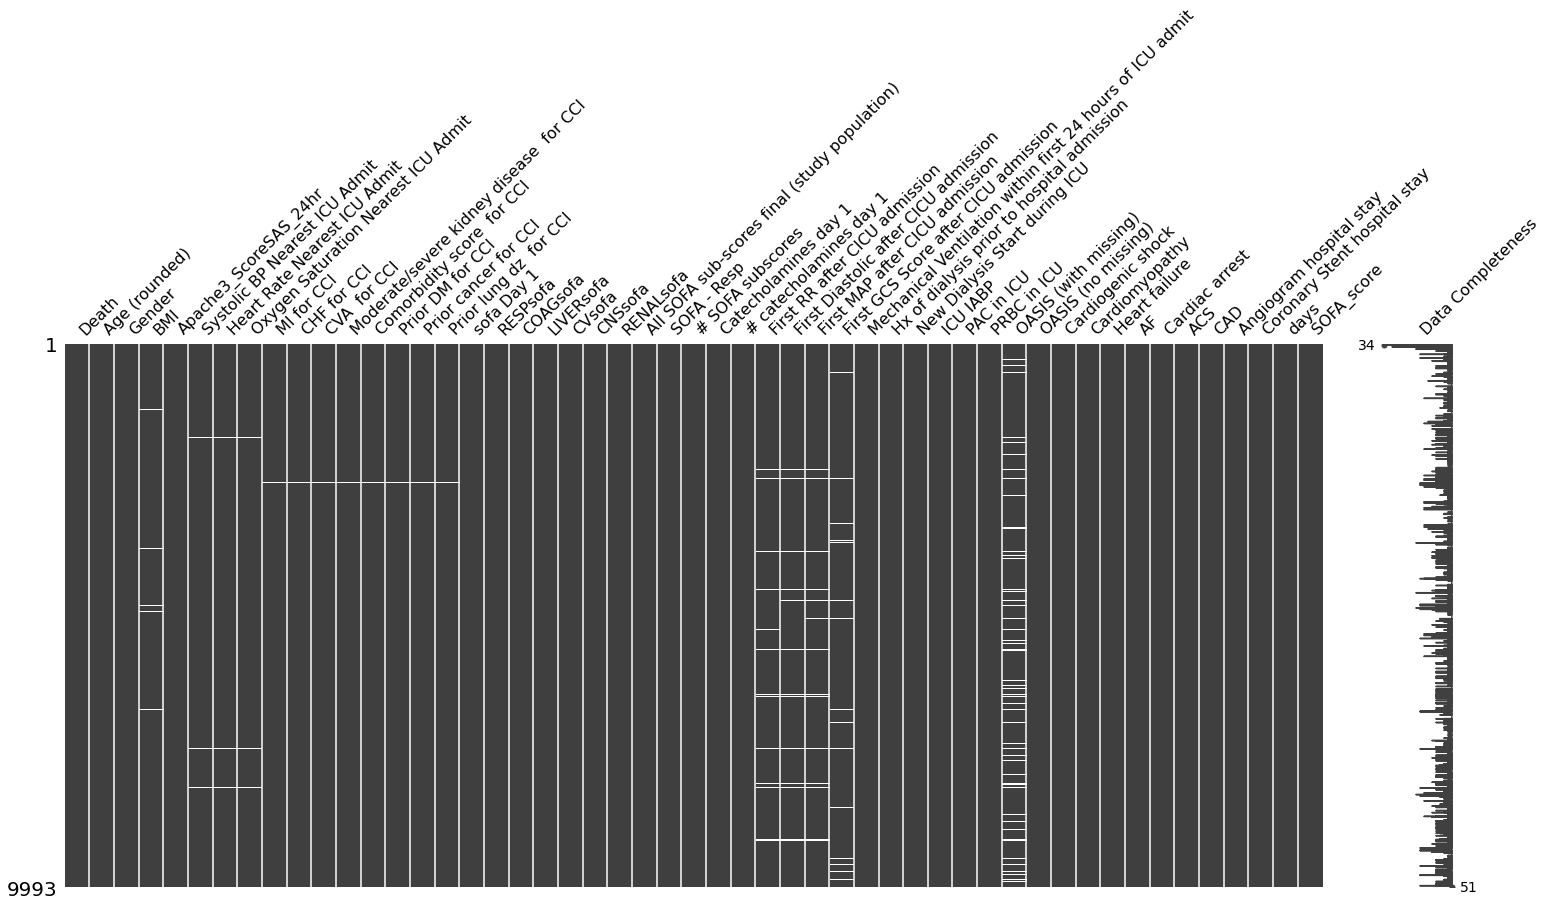

In [ ]:
msno.matrix(patients,labels=True)

In [ ]:
#drop unnecessary fields 
patients = patients.drop(columns=['sofa Day 1','All SOFA sub-scores final (study population)','SOFA - Resp','# SOFA subscores'])
patients

,Death,Age (rounded),Gender,BMI,Apache3_ScoreSAS_24hr,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,OASIS (with missing),OASIS (no missing),Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days,SOFA_score
0,0,84,0,29.085332,53,140.0,85.0,95.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,68.0,85.0,NaN,0,0,0,0,0,0,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,8.38,3.0
1,0,54,1,29.681633,41,105.0,49.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,13.0,63.0,75.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,3.46,3.0
2,0,65,0,18.744796,42,125.0,85.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.0,70.0,84.0,15.0,0,0,0,0,0,0,12.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.96,1.0
3,0,54,1,21.913580,24,188.0,71.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,101.0,113.0,15.0,0,0,0,0,0,0,15.0,15,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,8.57,1.0
4,0,59,1,0.000000,34,110.0,82.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.0,56.0,64.0,15.0,0,0,0,0,0,0,23.0,23,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,2.70,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,1,65,0,25.383707,71,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,16.0,45.0,60.0,15.0,0,0,0,0,0,0,31.0,31,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,8.55,5.0
10000,1,66,1,22.305471,180,94.0,120.0,75.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,0.0,4,2.0,0.0,4.0,4.0,1.0,1.0,2.0,27.0,55.0,63.0,3.0,1,0,0,0,1,0,49.0,49,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,2.30,15.0
10001,0,56,1,24.772097,89,134.0,108.0,95.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3,0.0,0.0,4.0,0.0,1.0,1.0,1.0,17.0,62.0,92.0,3.0,0,0,0,1,1,0,49.0,49,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1,21.16,8.0
10002,0,54,1,33.333333,109,169.0,55.0,84.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,3,0.0,0.0,3.0,3.0,1.0,1.0,2.0,19.0,87.0,105.0,7.0,1,0,0,0,0,0,43.0,43,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1,1,14.22,10.0


In [ ]:
#dropping OASIS score colum with missing value and consider column with non-missing values
patients['OASIS_score'] = patients['OASIS (no missing)']
patients = patients.drop(columns=['OASIS (with missing)','OASIS (no missing)'])
patients

,Death,Age (rounded),Gender,BMI,Apache3_ScoreSAS_24hr,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days,SOFA_score,OASIS_score
0,0,84,0,29.085332,53,140.0,85.0,95.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,68.0,85.0,NaN,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,8.38,3.0,25
1,0,54,1,29.681633,41,105.0,49.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,13.0,63.0,75.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,3.46,3.0,15
2,0,65,0,18.744796,42,125.0,85.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.0,70.0,84.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.96,1.0,12
3,0,54,1,21.913580,24,188.0,71.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,101.0,113.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,8.57,1.0,15
4,0,59,1,0.000000,34,110.0,82.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.0,56.0,64.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,2.70,1.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,1,65,0,25.383707,71,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,16.0,45.0,60.0,15.0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,8.55,5.0,31
10000,1,66,1,22.305471,180,94.0,120.0,75.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,0.0,4,2.0,0.0,4.0,4.0,1.0,1.0,2.0,27.0,55.0,63.0,3.0,1,0,0,0,1,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,2.30,15.0,49
10001,0,56,1,24.772097,89,134.0,108.0,95.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3,0.0,0.0,4.0,0.0,1.0,1.0,1.0,17.0,62.0,92.0,3.0,0,0,0,1,1,0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1,21.16,8.0,49
10002,0,54,1,33.333333,109,169.0,55.0,84.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,3,0.0,0.0,3.0,3.0,1.0,1.0,2.0,19.0,87.0,105.0,7.0,1,0,0,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1,1,14.22,10.0,43


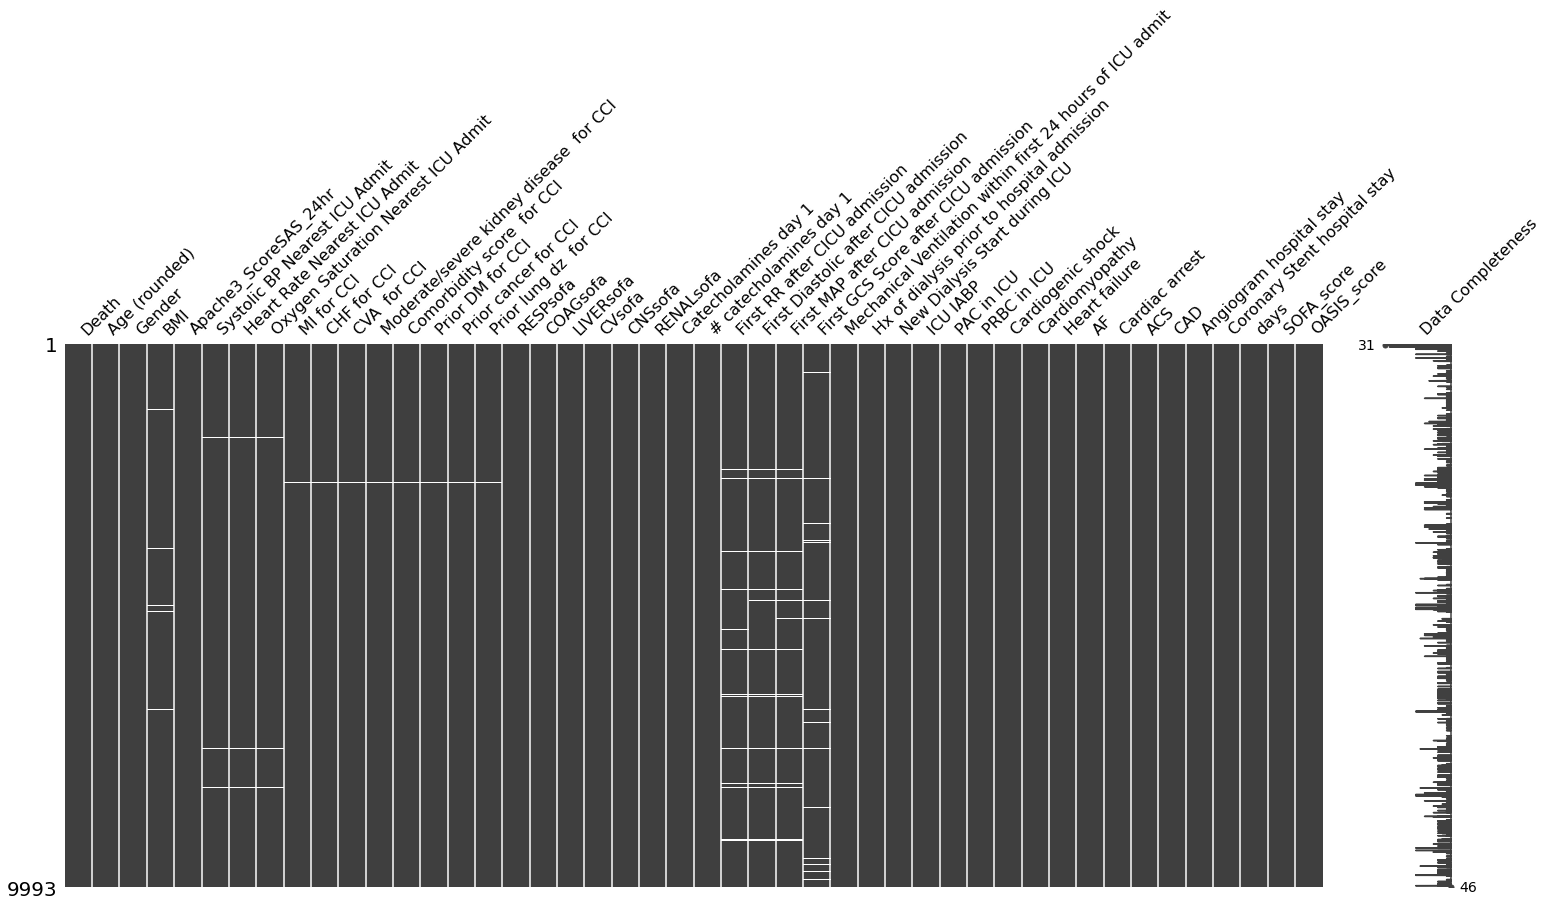

In [ ]:
#check missing values
msno.matrix(patients,labels=True)

In [ ]:
#drop patients having some missing values
patients = patients.dropna()

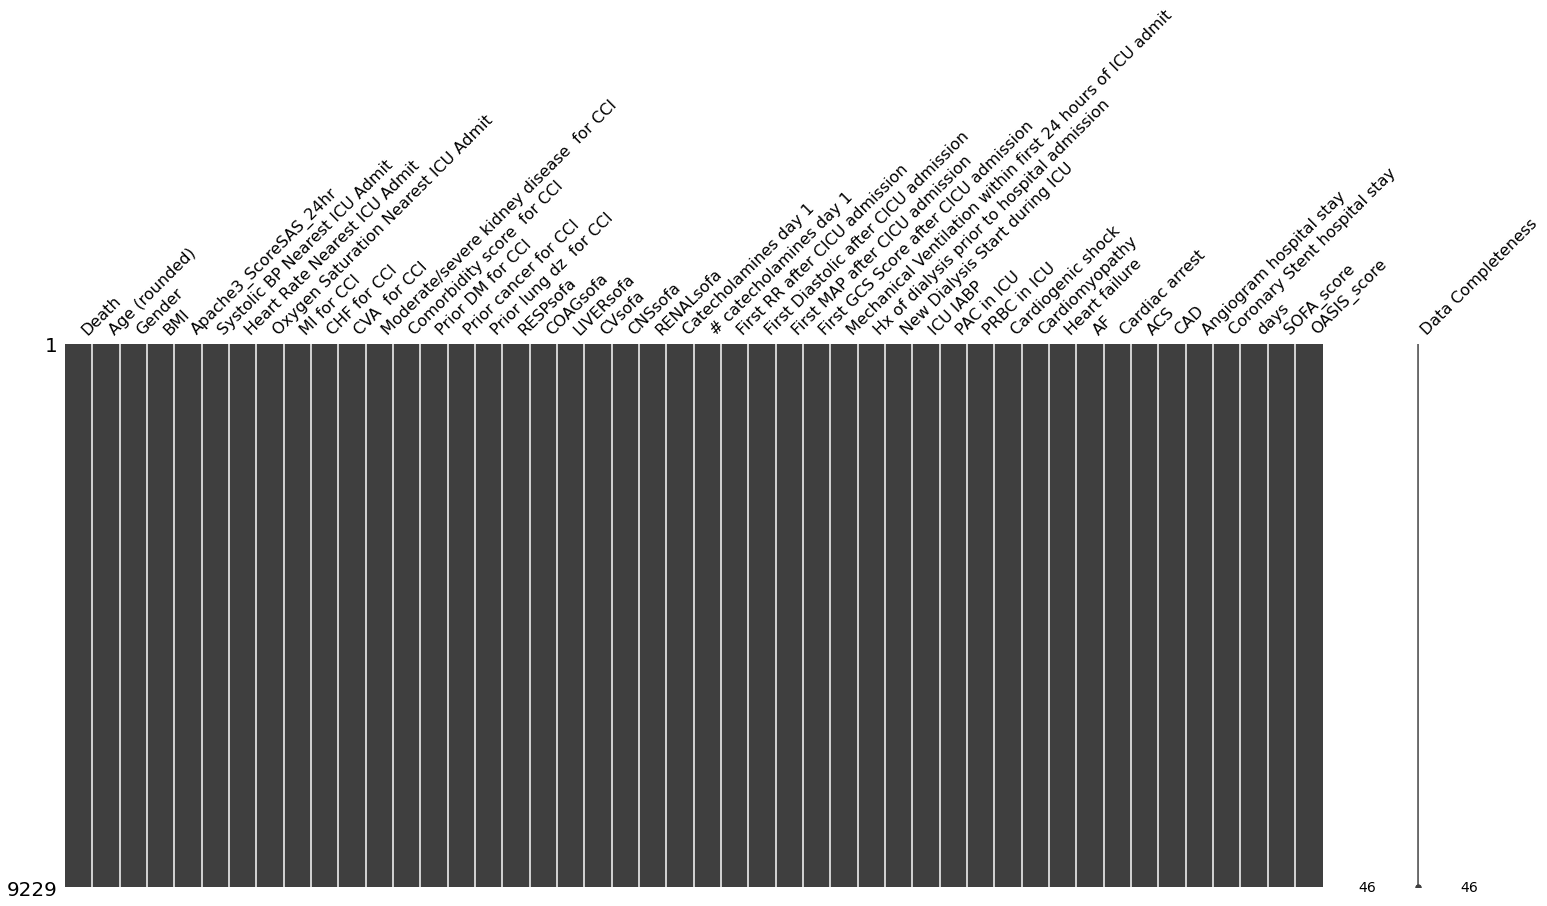

In [ ]:
msno.matrix(patients,labels=True)

In [ ]:
patients.describe()

,Death,Age (rounded),Gender,BMI,Apache3_ScoreSAS_24hr,Systolic BP Nearest ICU Admit,Heart Rate Nearest ICU Admit,Oxygen Saturation Nearest ICU Admit,MI for CCI,CHF for CCI,CVA for CCI,Moderate/severe kidney disease for CCI,Comorbidity score for CCI,Prior DM for CCI,Prior cancer for CCI,Prior lung dz for CCI,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Catecholamines day 1,# catecholamines day 1,First RR after CICU admission,First Diastolic after CICU admission,First MAP after CICU admission,First GCS Score after CICU admission,Mechanical Ventilation within first 24 hours of ICU admit,Hx of dialysis prior to hospital admission,New Dialysis Start during ICU,ICU IABP,PAC in ICU,PRBC in ICU,Cardiogenic shock,Cardiomyopathy,Heart failure,AF,Cardiac arrest,ACS,CAD,Angiogram hospital stay,Coronary Stent hospital stay,days,SOFA_score,OASIS_score
count,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.00000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000
mean,0.082241,67.549247,0.626070,29.548125,61.501571,123.314660,81.94008,95.807888,0.202080,0.198613,0.125799,0.410229,2.404052,0.287138,0.215083,0.196338,0.789035,0.315961,0.098602,1.237512,0.340665,0.791960,0.173692,0.246506,18.448499,69.393976,83.500271,13.778741,0.141077,0.057428,0.030881,0.085491,0.072489,0.118973,0.079207,0.135334,0.388775,0.315527,0.076065,0.429516,0.606350,0.522592,0.349225,7.216847,4.011702,25.709178
std,0.274746,15.231535,0.483872,7.077341,25.123741,26.215911,23.31713,5.739263,0.401574,0.398978,0.331641,0.807614,2.631753,0.452451,0.410902,0.397248,1.310003,0.625344,0.416171,0.872034,0.930679,1.102592,0.378865,0.610751,5.747799,16.892029,17.890613,3.146030,0.348120,0.232671,0.173004,0.279627,0.259310,0.323774,0.270076,0.342099,0.487498,0.464751,0.265116,0.495034,0.488585,0.499516,0.476751,12.400252,3.420956,10.340829
min,0.000000,18.000000,0.000000,0.000000,10.000000,50.000000,21.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,21.000000,31.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,4.000000
25%,0.000000,58.000000,0.000000,24.954731,44.000000,105.000000,67.00000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,58.000000,72.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.590000,1.000000,18.000000
50%,0.000000,69.000000,1.000000,28.437500,58.000000,121.000000,79.00000,97.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,68.000000,82.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.170000,3.000000,24.000000
75%,0.000000,79.000000,1.000000,33.067867,74.000000,140.000000,94.00000,99.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,21.000000,79.000000,93.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,7.990000,6.000000,31.000000
max,1.000000,105.000

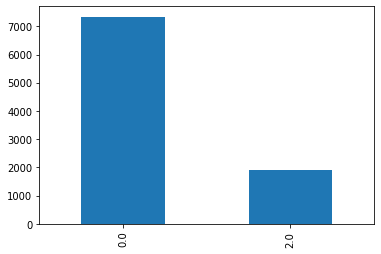

In [ ]:
patients['Moderate/severe kidney disease  for CCI'].value_counts().plot(kind='bar')

In [ ]:
patients['Moderate/severe kidney disease  for CCI'] = patients['Moderate/severe kidney disease  for CCI'].apply(lambda x: 1 if x==2 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


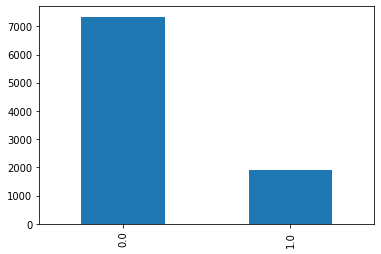

In [ ]:
patients['Moderate/severe kidney disease  for CCI'].value_counts().plot(kind='bar')

In [ ]:
#renaming all fields
rename_columns = {'Age (rounded)':'Age',
                  'Apache3_ScoreSAS_24hr':'Apache3_score',
                  'Systolic BP Nearest ICU Admit':'Blood_presure',
                  'Heart Rate Nearest ICU Admit':'Heart_rate',
                  'Oxygen Saturation Nearest ICU Admit':'Oxygen_saturation',
                  'MI for CCI':'Myocardial_infarction',
                  'CHF for CCI':'Congestive_heart_failure',
                  'CVA  for CCI':'Cerebro_vascular_accident',
                  'Moderate/severe kidney disease  for CCI':'Kidney_disease_severity',
                  'Comorbidity score  for CCI':'Cormorbility_score',
                  'Prior DM for CCI':'Diabetes_mellitus',
                  'Prior cancer for CCI':'Prior_cancer',
                  'Prior lung dz  for CCI':'Prior_lung_disease',
                  'Catecholamines day 1':'Catecholamines_presence',
                  '# catecholamines day 1':'Catecholamines',
                  'First RR after CICU admission':'Respiration_rate',
                  'First Diastolic after CICU admission':'Diastolic',
                  'First MAP after CICU admission':'Mean_Arterial_pressure',
                  'First GCS Score after CICU admission':'Glasgow_coma_scale',
                  'Mechanical Ventilation within first 24 hours of ICU admit':'Ventilation',
                  'Hx of dialysis prior to hospital admission':'Previous_Dialysis',
                  'New Dialysis Start during ICU':'On_dialysis',
                  'ICU IABP':'On_intra-aortic_balloon_pump',
                  'PAC in ICU':'Pre-anesthesia_checkup',
                  'PRBC in ICU':'Packed_red_blood_cells',
                  'Cardiogenic shock':'Cardiogenic_shock',
                  'Heart failure':'Heart_failure',
                  'AF':'Irregular_heartbeat',
                  'Cardiac arrest':'Cardiac_arrest',
                  'ACS':'Acute_coronary_syndrome',
                  'CAD':'Coronary_artery_disease',
                  'Angiogram hospital stay':'Angiogram_hospital_stay',
                  'Coronary Stent hospital stay':'Coronary_stent'}
patients = patients.rename(columns=rename_columns)

In [ ]:
patients

,Death,Age,Gender,BMI,Apache3_score,Blood_presure,Heart_rate,Oxygen_saturation,Myocardial_infarction,Congestive_heart_failure,Cerebro_vascular_accident,Kidney_disease_severity,Cormorbility_score,Diabetes_mellitus,Prior_cancer,Prior_lung_disease,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Catecholamines_presence,Catecholamines,Respiration_rate,Diastolic,Mean_Arterial_pressure,Glasgow_coma_scale,Ventilation,Previous_Dialysis,On_dialysis,On_intra-aortic_balloon_pump,Pre-anesthesia_checkup,Packed_red_blood_cells,Cardiogenic_shock,Cardiomyopathy,Heart_failure,Irregular_heartbeat,Cardiac_arrest,Acute_coronary_syndrome,Coronary_artery_disease,Angiogram_hospital_stay,Coronary_stent,days,SOFA_score,OASIS_score
1,0,54,1,29.681633,41,105.0,49.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,13.0,63.0,75.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,3.46,3.0,15
2,0,65,0,18.744796,42,125.0,85.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.0,70.0,84.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.96,1.0,12
3,0,54,1,21.913580,24,188.0,71.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,101.0,113.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,8.57,1.0,15
4,0,59,1,0.000000,34,110.0,82.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.0,56.0,64.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,2.70,1.0,23
5,0,50,1,22.446126,65,96.0,70.0,85.0,0.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,3.0,0.0,0.0,20.0,87.0,90.0,15.0,0,1,0,0,0,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,4.81,7.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,1,72,0,32.656250,65,80.0,70.0,97.0,1.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,20.0,102.0,106.0,15.0,0,0,0,0,1,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,0,6.76,3.0,28
9999,1,65,0,25.383707,71,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,16.0,45.0,60.0,15.0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,8.55,5.0,31
10000,1,66,1,22.305471,180,94.0,120.0,75.0,0.0,1.0,0.0,1.0,8.0,0.0,1.0,0.0,4,2.0,0.0,4.0,4.0,1.0,1.0,2.0,27.0,55.0,63.0,3.0,1,0,0,0,1,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,2.30,15.0,49
10001,0,56,1,24.772097,89,134.0,108.0,95.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3,0.0,0.0,4.0,0.0,1.0,1.0,1.0,17.0,62.0,92.0,3.0,0,0,0,1,1,0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1,21.16,8.0,49


columns having more than 0.8 coefficient : ['Catecholamines_presence', 'Catecholamines', 'Mean_Arterial_pressure', 'Ventilation']


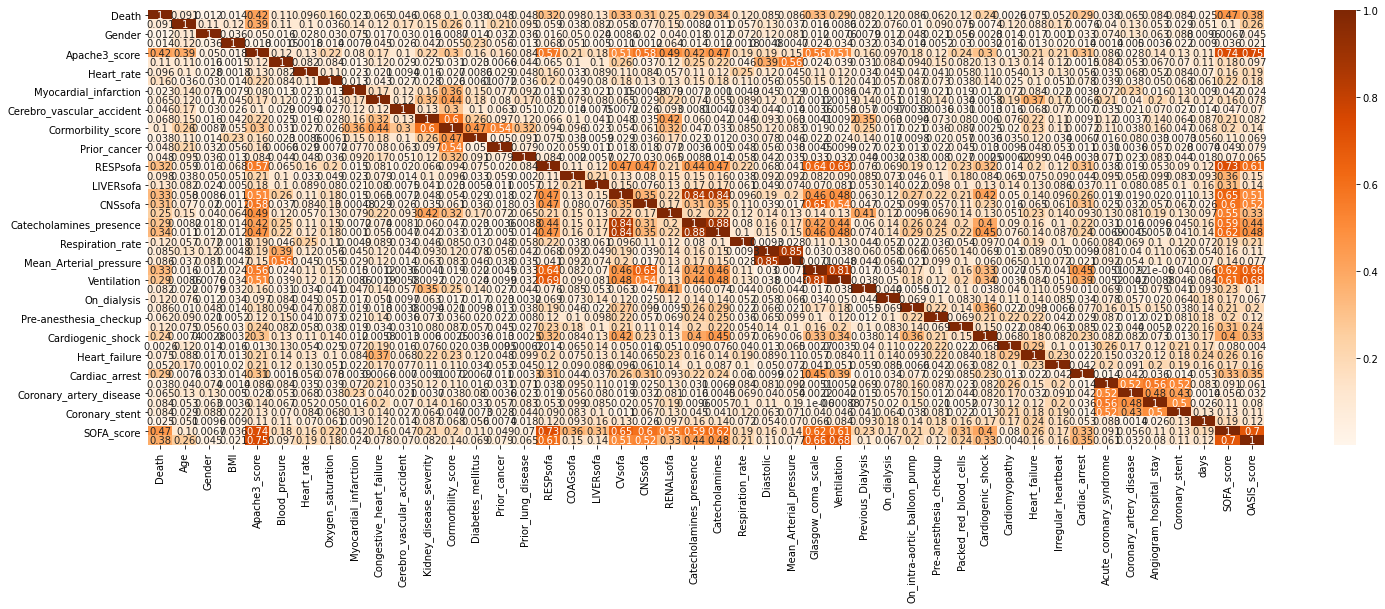

In [ ]:
#finding corelation coefficient by pearson's correlation
corr_matrix = patients.corr().abs()
plt.figure(figsize=(25, 8))
sb.heatmap(corr_matrix, annot=True, cmap='Oranges')

#selecting upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#getting columns if it has greater than 0.8 corelation coefficiant
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print('columns having more than 0.8 coefficient : {}'.format(to_drop))

In [ ]:
#dropping columns
patients = patients.drop(columns=to_drop)

In [ ]:
patients

,Death,Age,Gender,BMI,Apache3_score,Blood_presure,Heart_rate,Oxygen_saturation,Myocardial_infarction,Congestive_heart_failure,Cerebro_vascular_accident,Kidney_disease_severity,Cormorbility_score,Diabetes_mellitus,Prior_cancer,Prior_lung_disease,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Respiration_rate,Diastolic,Glasgow_coma_scale,Previous_Dialysis,On_dialysis,On_intra-aortic_balloon_pump,Pre-anesthesia_checkup,Packed_red_blood_cells,Cardiogenic_shock,Cardiomyopathy,Heart_failure,Irregular_heartbeat,Cardiac_arrest,Acute_coronary_syndrome,Coronary_artery_disease,Angiogram_hospital_stay,Coronary_stent,days,SOFA_score,OASIS_score
1,0,54,1,29.681633,41,105.0,49.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,1.0,0.0,0.0,13.0,63.0,15.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,3.46,3.0,15
2,0,65,0,18.744796,42,125.0,85.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,17.0,70.0,15.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.96,1.0,12
3,0,54,1,21.913580,24,188.0,71.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,10.0,101.0,15.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,8.57,1.0,15
4,0,59,1,0.000000,34,110.0,82.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,19.0,56.0,15.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,2.70,1.0,23
5,0,50,1,22.446126,65,96.0,70.0,85.0,0.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,3.0,20.0,87.0,15.0,1,0,0,0,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,4.81,7.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,1,72,0,32.656250,65,80.0,70.0,97.0,1.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,20.0,102.0,15.0,0,0,0,1,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,0,6.76,3.0,28
9999,1,65,0,25.383707,71,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,3.0,16.0,45.0,15.0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,8.55,5.0,31
10000,1,66,1,22.305471,180,94.0,120.0,75.0,0.0,1.0,0.0,1.0,8.0,0.0,1.0,0.0,4,2.0,0.0,4.0,4.0,1.0,27.0,55.0,3.0,0,0,0,1,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,2.30,15.0,49
10001,0,56,1,24.772097,89,134.0,108.0,95.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3,0.0,0.0,4.0,0.0,1.0,17.0,62.0,3.0,0,0,1,1,0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1,21.16,8.0,49


In [ ]:
#export dataset

def export_dataset(data,filename):
  data.to_csv(filename, index=False)

In [ ]:
export_dataset(patients,'cleaned_sofa.csv')